## Business Objective

Lending Club is a lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. 
Therefore, the objective of this case is to identify patterns or the factors which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring Data

In [2]:
# Loading the data

df = pd.read_csv("loan.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#understand the shape of df
df.shape

(39717, 111)

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
df = df.drop_duplicates()

## Dropping columns with more than 30% of missing values.

In [7]:
#Checking missing value columns
null_column =[]
for i in df.columns:

  x =df[i].isnull().sum()
  if x/len(df) >0.30: # getting the columns which has more than 30% of null values 
    null_column.append(i)
  print("{} has {} missing values".format(i,x) )

#print(null_column)

id has 0 missing values
member_id has 0 missing values
loan_amnt has 0 missing values
funded_amnt has 0 missing values
funded_amnt_inv has 0 missing values
term has 0 missing values
int_rate has 0 missing values
installment has 0 missing values
grade has 0 missing values
sub_grade has 0 missing values
emp_title has 2459 missing values
emp_length has 1075 missing values
home_ownership has 0 missing values
annual_inc has 0 missing values
verification_status has 0 missing values
issue_d has 0 missing values
loan_status has 0 missing values
pymnt_plan has 0 missing values
url has 0 missing values
desc has 12940 missing values
purpose has 0 missing values
title has 11 missing values
zip_code has 0 missing values
addr_state has 0 missing values
dti has 0 missing values
delinq_2yrs has 0 missing values
earliest_cr_line has 0 missing values
inq_last_6mths has 0 missing values
mths_since_last_delinq has 25682 missing values
mths_since_last_record has 36931 missing values
open_acc has 0 missing 

#### Droping the columns with more than 30% of the missing Values.

In [8]:
data_loan = df.drop(null_column, axis= 1)

### Looking for the number of unique values present in each column

In [9]:
# From the df2 it is seem that few columns has only 1 unique value which  means they are of no use so deleting those column.
for i in data_loan.columns:
   print(i , data_loan[i].nunique())


id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
url 39717
purpose 14
title 19615
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


From the above we found that we have few columns which have only 1 value. deleting those columns

In [10]:
# From the above we found that we have few column which has only 1 value. deleting those column

one_value = ['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan']

data_loan = data_loan.drop(one_value, axis = 1)

From the above we also found that we have few columns where with all unique values. droping those columns and will not help in our analysis.

In [11]:
# Droping the column id, zip(partial value), member_id and url as they have unique values

data_loan = data_loan.drop(['id','member_id', 'url', 'zip_code',"addr_state"] , axis = 1)

In [12]:
# From the df2 it is seem that few columns has only 1 unique value which  means they are of no use so deleting those column.
for i in data_loan.columns:
   print(i , data_loan[i].value_counts())


loan_amnt 10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64
funded_amnt 10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64
funded_amnt_inv 5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: funded_amnt_inv, Length: 8205, dtype: int64
term  36 months    29096
 60 months    10621
Name: term, dtype: int64
int_rate 10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64
installme

We can delete the column "emp_title", "title" as there is no connection with the title of a borrower and where the borrower is defaulter and "title" is a text field.

In [13]:
# we can delete the row where "emp_title" 

data_loan = data_loan.drop(["emp_title","title"],axis=1)




In the Problem statement, it is mentioned that the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default which The company can utilise its portfolio and risk assessment. 

Therefore, below provided variable are related to post approval of the loan. So, we are dropping this columns. 


*   last_pymnt_d: Last month payment was received
*   last_pymnt_amnt : Last total payment amount received
*   last_credit_pull_d: The most recent month LC pulled credit for this loan
*   total_pymnt: Payments received to date for total amount funded.
*   total_rec_int :Interest received to date
*   total_pymnt_inv: Payments received to date for portion of total amount funded by investors.
*   total_rec_prncp: Principal received to date
*   delinq_2yrs: The number of 30+ days past-due incidences of delinquency(you are behind on payments) in the borrower's credit file for the past 2 years
*   pub_rec: Number of derogatory public records
*   revol_bal: Total credit revolving balance
*   revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
*   open_acc: The number of open credit lines in the borrower's credit file.
*   total_acc: The total number of credit lines currently in the borrower's credit file
*   earliest_cr_line:The month the borrower's earliest reported credit line was opened.
* inq_last_6mths:






In [14]:
data_loan = data_loan.drop(["last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","total_pymnt","total_rec_int","total_rec_prncp","delinq_2yrs","total_pymnt_inv","pub_rec","revol_bal","revol_util","open_acc","total_acc","earliest_cr_line","inq_last_6mths",'out_prncp','out_prncp_inv','total_rec_late_fee', 'recoveries','collection_recovery_fee'],axis=1)

Deleting the rows which has 3 or more than 3 column value as null.

In [15]:
# droping the row having more than 3 values are null.
x =data_loan[data_loan.isnull().sum(axis = 1)>=3].index

data_loan = data_loan.drop(x)

Checking the shape of the dataframe and Also, the number of null values remaing.

In [16]:
data_loan.shape

(39717, 17)

### Standarding the columns.

In [17]:
data_loan['int_rate'] = data_loan['int_rate'].apply(lambda x: float(x.split('%')[0]))


In [18]:
#replace = ['year', 'years', '+ years', '<']
data_loan['issue_d_month'],  data_loan["issue_d_yy"] = data_loan['issue_d'].str.split('-').str
#change the datatype of month to int64 and droping issue_d column 
data_loan['issue_d_yy'] = data_loan['issue_d_yy'].apply(lambda x: int(x))
data_loan = data_loan.drop('issue_d', axis= 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


#### Columns name with meaning:

* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. 
* funded_amnt: The total amount committed to that loan at that point in time.
* funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
* Term: The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate: Interest Rate on the loan
* Installment: The monthly payment owed by the borrower if the loan originates.
* Grade: LC assigned loan grade
* sub_grade: LC assigned loan subgrade
* emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
* home_ownership: The home ownership status provided by the borrower during registration
* annual_inc: The self-reported annual income provided by the borrower during registration.
* verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
* loan_status: Current status of the loan.
* purpose: A category provided by the borrower for the loan request. 
* dti(Debt to Income): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* pub_rec_bankruptcies: Number of public record bankruptcies.
* issue_d_month: The month which the loan was funded
* issue_d_yy: The year which the loan was funded


### Filling the missing values

In [19]:
#checking the missing value again
data_loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
pub_rec_bankruptcies     697
issue_d_month              0
issue_d_yy                 0
dtype: int64

pub_rec_bankruptcies columns null value can be imputed by median.
emp_length: since it is a categorical feature, it can be filled by mode.

In [20]:
data_loan['pub_rec_bankruptcies'] = data_loan['pub_rec_bankruptcies'].fillna(data_loan['pub_rec_bankruptcies'].median())

In [21]:
data_loan['emp_length'] = data_loan['emp_length'].fillna(data_loan['emp_length'].mode())

### Univariate and segmented analysis of Numerical features.

In [22]:
data_loan = data_loan[data_loan['loan_status']!='Current']



In [23]:
data_loan.shape

(38577, 18)

### Checking for Outliers.

In [24]:
data_loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_d_yy
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.042694,10.309070
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.202809,0.882658
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,7.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,10.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,11.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,11.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000,11.000000


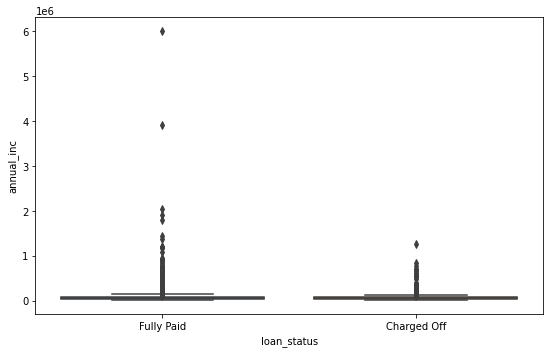

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = data_loan)
plt.show()

In [26]:
data_loan.annual_inc.quantile([0.75,0.79,0.80,0.82,0.85,0.88,0.90,0.92,0.95,0.98,0.99])

0.75     82000.00
0.79     89000.00
0.80     90000.00
0.82     94500.00
0.85    100000.00
0.88    108057.72
0.90    115000.00
0.92    122000.00
0.95    140004.00
0.98    187000.00
0.99    234144.00
Name: annual_inc, dtype: float64

The outlier can be revomed by using the percentile methode. when we can remove the rows where annual income percentile is more than 95

In [27]:
#Code for removing the rows with annual income more than 95 percentile.
P = np.percentile(data_loan.annual_inc, [95])
data_loan = data_loan[data_loan.annual_inc < P[0]]

In [28]:
data_loan.loan_amnt.quantile([0.79,0.80,0.82,0.85,0.88,0.90,0.92,0.95,0.98,0.99])

0.79    15000.0
0.80    16000.0
0.82    16050.0
0.85    18000.0
0.88    20000.0
0.90    20000.0
0.92    22400.0
0.95    25000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [29]:
data_loan.installment.quantile([0.79,0.80,0.82,0.85,0.88,0.90,0.92,0.95,0.98,0.99])

0.79    452.8173
0.80    463.0860
0.82    483.1600
0.85    509.8300
0.88    549.6900
0.90    588.9850
0.92    636.9248
0.95    706.4905
0.98    848.0158
0.99    898.2690
Name: installment, dtype: float64

In [30]:
data_loan.int_rate.quantile([0.79,0.80,0.82,0.85,0.88,0.90,0.92,0.95,0.98,0.99])

0.79    14.91
0.80    15.20
0.82    15.31
0.85    15.95
0.88    16.40
0.90    16.77
0.92    17.27
0.95    18.25
0.98    19.91
0.99    20.89
Name: int_rate, dtype: float64

In [31]:
data_loan.funded_amnt_inv.quantile([0.79,0.80,0.82,0.85,0.88,0.90,0.92,0.95,0.98,0.99])

0.79    14800.000000
0.80    14975.000000
0.82    15000.000000
0.85    16400.000000
0.88    18052.000000
0.90    19750.000000
0.92    20000.000000
0.95    23925.000000
0.98    27950.657508
0.99    31957.222252
Name: funded_amnt_inv, dtype: float64

In [32]:
data_loan.funded_amnt.quantile([0.79,0.80,0.82,0.85,0.88,0.90,0.92,0.95,0.98,0.99])

0.79    15000.0
0.80    15000.0
0.82    16000.0
0.85    17500.0
0.88    19750.0
0.90    20000.0
0.92    21000.0
0.95    25000.0
0.98    28100.0
0.99    34000.0
Name: funded_amnt, dtype: float64

Except annual income there are no Outlier present in the data set. 

### Dropping the rows with loan status as currents 

Based on the objective of the case study, I am considering only the two  categories of  target variable loan status(Fully paid and Charged off).

Since for current customer we don't know whether they will be defaulter or fully pay the bill so we are droping or leave these row for our analysis.

In [33]:
#Charged_off = df2[df2['loan_status']=='Charged Off']
#Fully = df2[df2['loan_status']=='Fully Paid']
data_loan = data_loan[data_loan['loan_status']!='Current']

In [34]:
data_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_yy'],
      dtype='object')

* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. 
* funded_amnt: The total amount committed to that loan at that point in time.
* funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
* term: The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate: Interest Rate on the loan
Installment: The monthly payment owed by the borrower if the loan originates.
* Grade: LC assigned loan grade
* sub_grade: LC assigned loan subgrade
* emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
* home_ownership: The home ownership status provided by the borrower during registration
* annual_inc: The self-reported annual income provided by the borrower during registration.
* verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
* loan_status: Current status of the loan.
* purpose: A category provided by the borrower for the loan request. 
* dti(Debt to Income): A ratio calculated using the borrower’s total monthly * debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* pub_rec_bankruptcies: Number of public record bankruptcies.
* issue_d_month: The month which the loan was funded
* issue_d_yy: The year which the loan was funded

## Univariate and segmented Analysis

### Univariate and segmented Analysis of Numerical Variable

#### Loan Ammount analysis

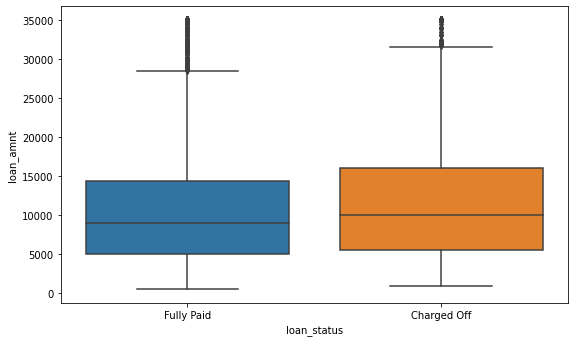

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = data_loan)
plt.show()

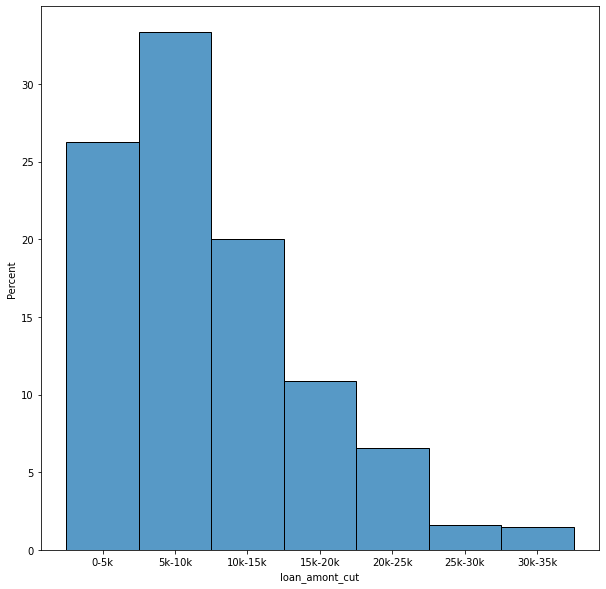

In [36]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
data_loan['loan_amont_cut'] = pd.cut(data_loan['loan_amnt'], bins = 7, labels=['0-5k', '5k-10k', '10k-15k', '15k-20k','20k-25k','25k-30k','30k-35k'])
sns.histplot(data = data_loan, x= 'loan_amont_cut', stat = 'percent')
plt.show()

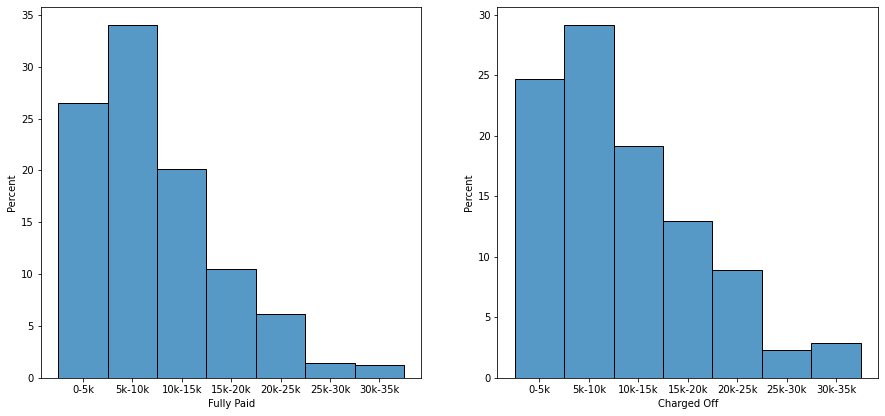

In [37]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.histplot(data_loan[data_loan['loan_status']=='Fully Paid']['loan_amont_cut'], stat = 'percent')
plt.xlabel("Fully Paid")
plt.subplot(2,2,2)
sns.histplot(data_loan[data_loan['loan_status']=='Charged Off']['loan_amont_cut'], stat = 'percent')
plt.xlabel("Charged Off")
plt.show()


From the above analysis I can state that the maximum percentage of loan amount is is between 5-10k. however, I cannot find any difference in the loan amount with respect to the loan status. Both fully paid borrowers and defaulters apply for same range of loan ammont.

#### Funded Amount invested by investors

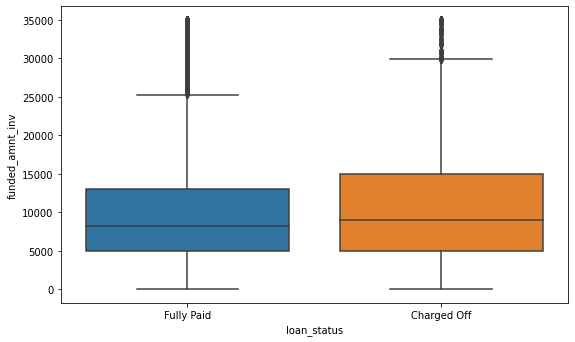

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'funded_amnt_inv', data = data_loan)
plt.show()

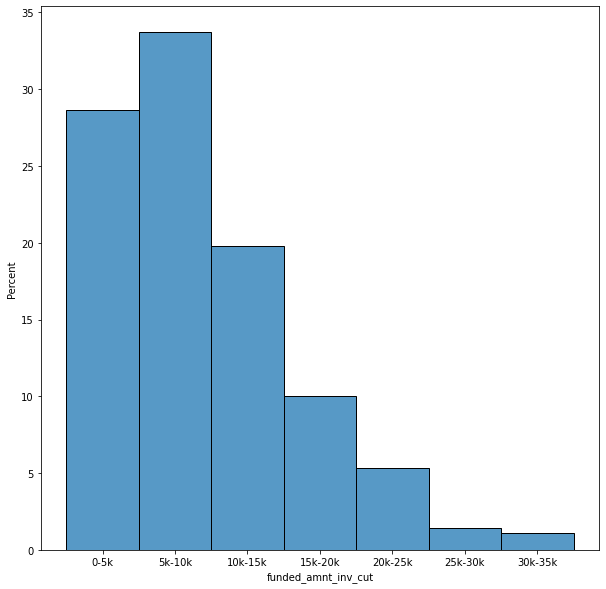

In [39]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
data_loan['funded_amnt_inv_cut'] = pd.cut(data_loan['funded_amnt_inv'], bins = 7, labels=['0-5k', '5k-10k', '10k-15k', '15k-20k','20k-25k','25k-30k','30k-35k'])
sns.histplot(data_loan['funded_amnt_inv_cut'], stat = 'percent')
plt.show()

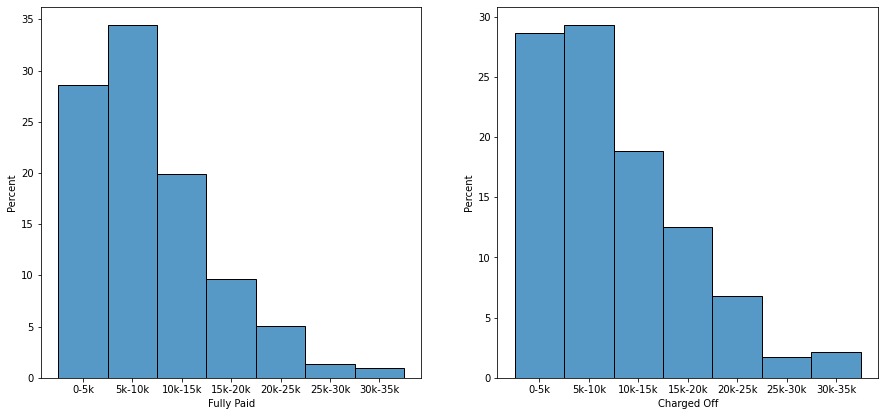

In [40]:
#Analysis the funded amount by investor column with respect to loan status.


plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.histplot(data_loan[data_loan['loan_status']=='Fully Paid']['funded_amnt_inv_cut'], stat = 'percent')
plt.xlabel("Fully Paid")
plt.subplot(2,2,2)
sns.histplot(data_loan[data_loan['loan_status']=='Charged Off']['funded_amnt_inv_cut'], stat = 'percent')
plt.xlabel("Charged Off")
plt.show()

From the graph it is evident that more than upto 28% of the amount funded by the investor to the defaulter is between the 5k-10k and  27% of the funded amount is between 0-5k. However, for fully paid borrowers the highest funded ammount is between 5k-10k with approx 33% .

#### Funded Amount

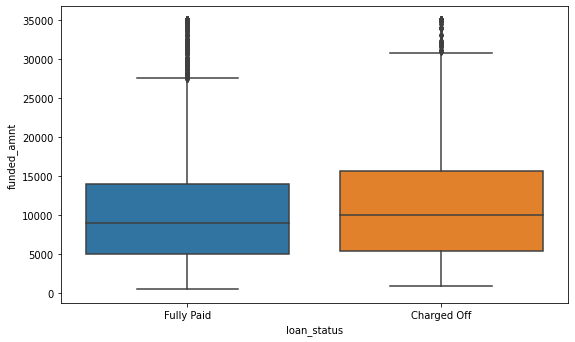

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'funded_amnt', data = data_loan)
plt.show()

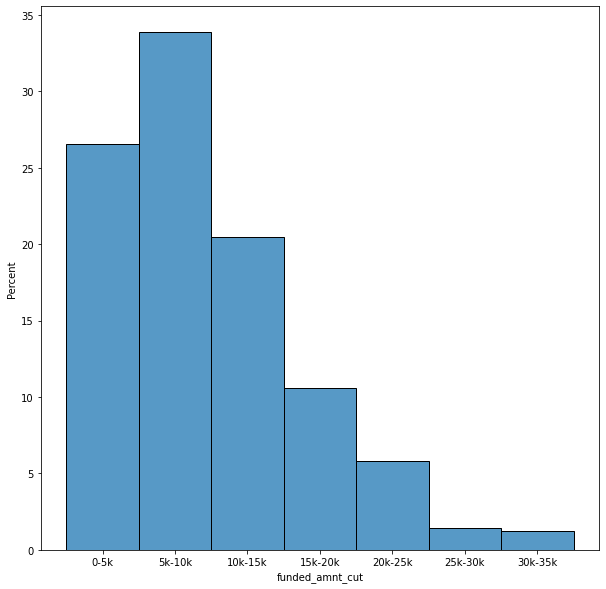

In [42]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
data_loan['funded_amnt_cut'] = pd.cut(data_loan['funded_amnt'], bins = 7, labels=['0-5k', '5k-10k', '10k-15k', '15k-20k','20k-25k','25k-30k','30k-35k'])
sns.histplot(data_loan['funded_amnt_cut'], stat = 'percent')
plt.show()

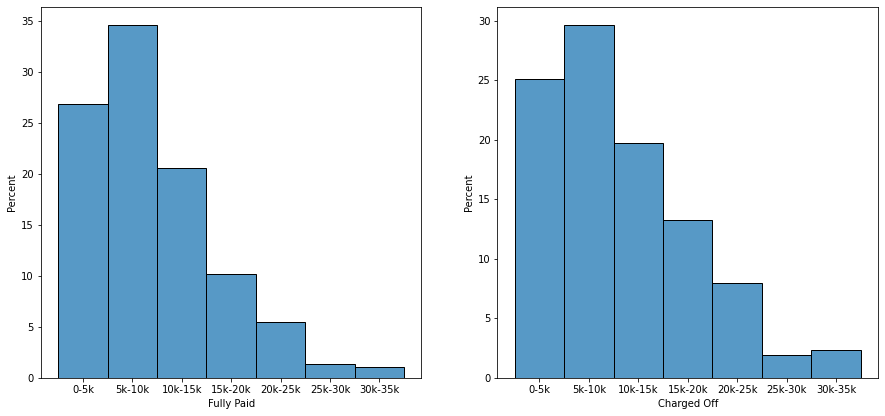

In [43]:
#Analysis the funded amount by investor column with respect to loan status.


plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.histplot(data_loan[data_loan['loan_status']=='Fully Paid']['funded_amnt_cut'], stat = 'percent')
plt.xlabel("Fully Paid")
plt.subplot(2,2,2)
sns.histplot(data_loan[data_loan['loan_status']=='Charged Off']['funded_amnt_cut'], stat = 'percent')
plt.xlabel("Charged Off")
plt.show()

From the graph it is evident that more than upto 28% of the amount funded  to the defaulter is between the 5k-10k and  24% of the funded amount is between 0-5k. However, for fully paid borrowers the highest funded ammount is between 5k-10k with approx 33% .

#### Interest Rate

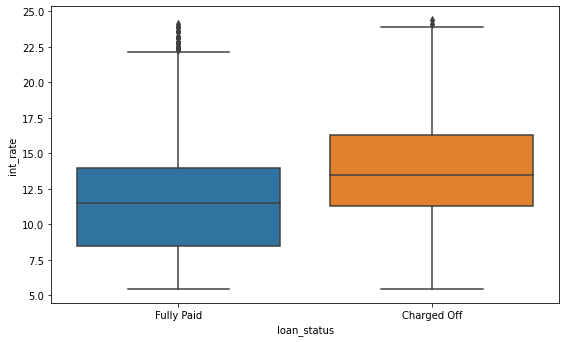

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'int_rate', data = data_loan)
plt.show()

In [45]:
data_loan['int_rate'].describe()

count    36642.000000
mean        11.887884
std          3.667161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

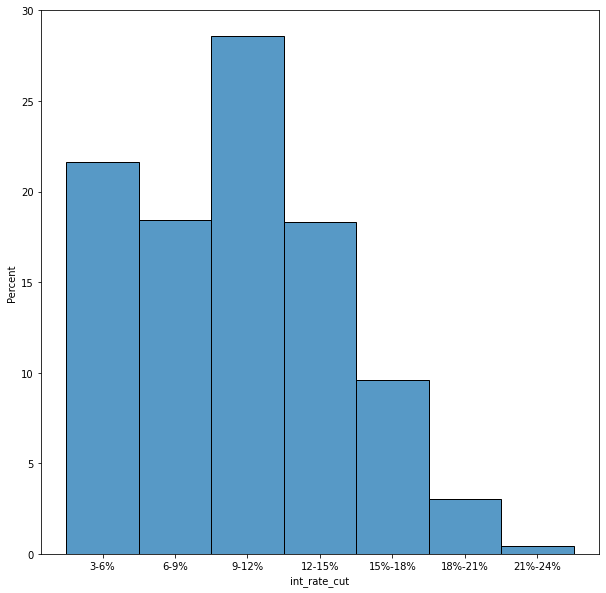

In [46]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
data_loan['int_rate_cut'] = pd.cut(data_loan['int_rate'], bins = 7, labels=['3-6%', '6-9%', '9-12%','12-15%','15%-18%','18%-21%', '21%-24%'])
sns.histplot(data_loan['int_rate_cut'], stat = 'percent')
plt.show()

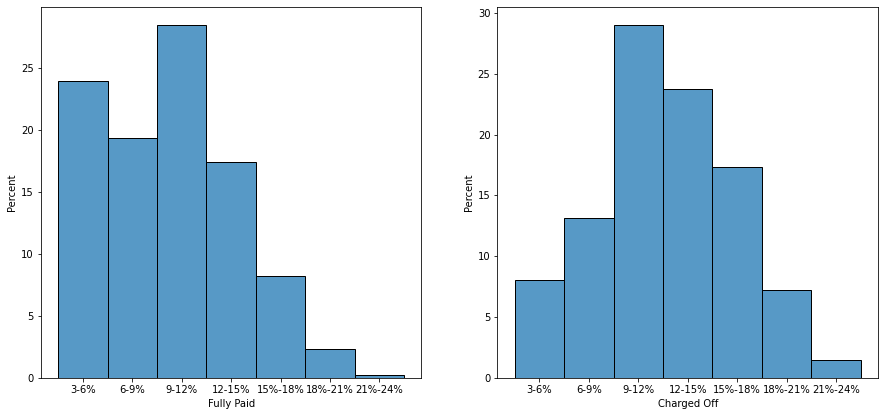

In [47]:
#Analysis the interest rate column with respect to loan status.


plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.histplot(data_loan[data_loan['loan_status']=='Fully Paid']['int_rate_cut'], stat = 'percent')
plt.xlabel("Fully Paid")
plt.subplot(222)
sns.histplot(data_loan[data_loan['loan_status']=='Charged Off']['int_rate_cut'], stat = 'percent')
plt.xlabel("Charged Off")
plt.show()

From the above analysis I can state that the maximum interest rate for fully Paid borrowers and defaulters are between 9-12%. 
However, it is also worth noticing that the around 24% of fully paid borrowers provided the loan with 3-6% interest rate whereas only approx 7% of loan funded for defaulters with the same interest rate.

#### Installment

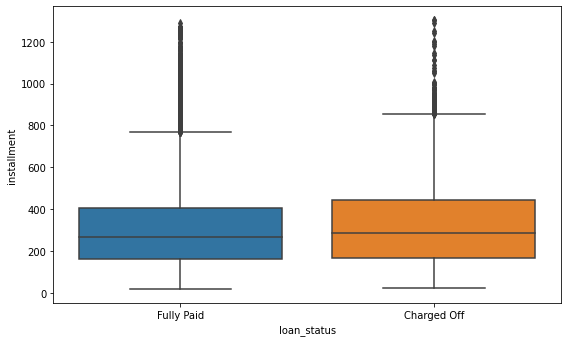

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'installment', data = data_loan)
plt.show()

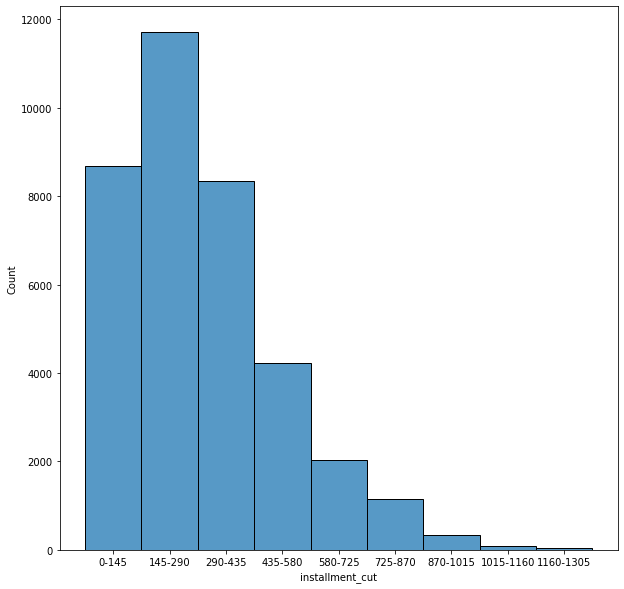

In [49]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
data_loan['installment_cut'] = pd.cut(data_loan['installment'], bins = 9, labels=['0-145', '145-290', '290-435','435-580','580-725','725-870','870-1015','1015-1160','1160-1305'])
sns.histplot(data_loan['installment_cut'], stat = 'count')
plt.show()

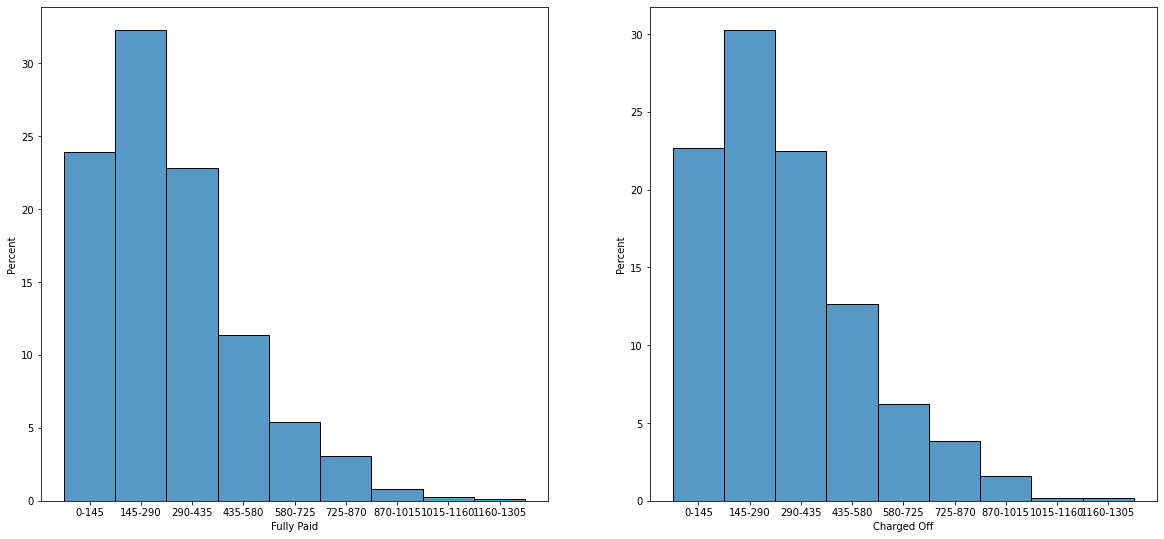

In [50]:
#Analysis the Installment column with respect to loan status.

# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(20, 20))
plt.subplot(221)
sns.histplot(data_loan[data_loan['loan_status']=='Fully Paid']['installment_cut'], stat = 'percent')
plt.xlabel("Fully Paid")
plt.subplot(222)
sns.histplot(data_loan[data_loan['loan_status']=='Charged Off']['installment_cut'], stat = 'percent')
plt.xlabel("Charged Off")
plt.show()

From the above analysis, the highest installment percentage is 145-290 for both fully paid and Charged Off borrowers.

#### Annual Income

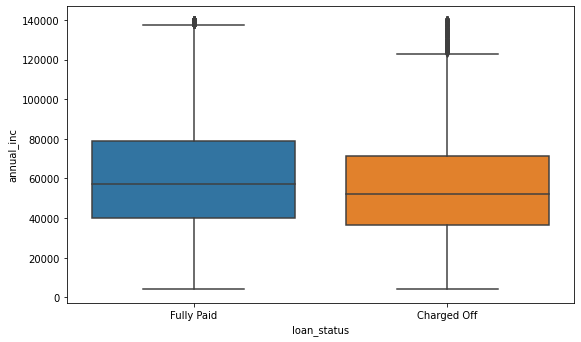

In [51]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = data_loan)
plt.show()

In [52]:
data_loan.annual_inc.describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

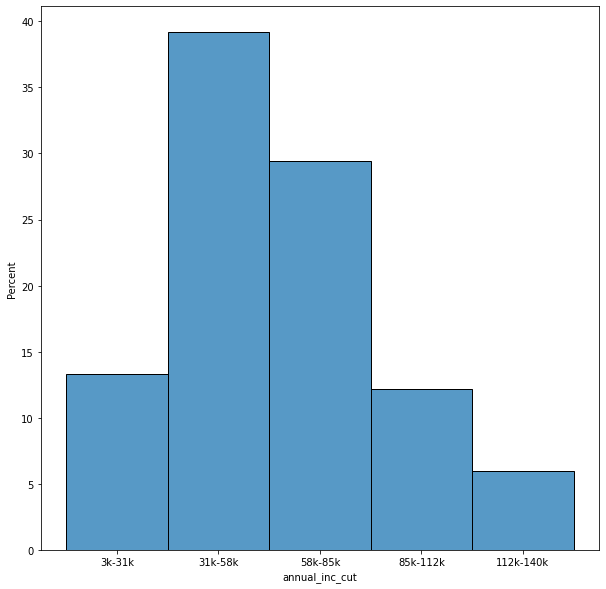

In [53]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
plt
data_loan['annual_inc_cut'] = pd.cut(data_loan['annual_inc'], bins = 5, labels=['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
sns.histplot(data_loan['annual_inc_cut'], stat = 'percent')
plt.show()

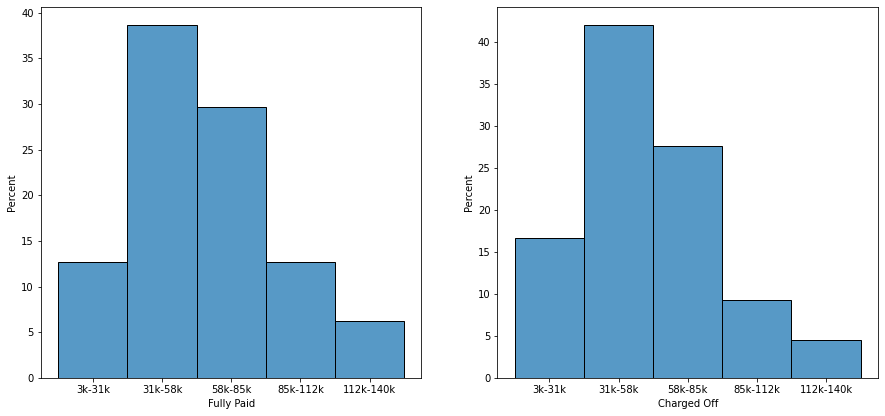

In [54]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.histplot(data_loan[data_loan['loan_status']=='Fully Paid']['annual_inc_cut'], stat = 'percent')
plt.xlabel("Fully Paid")
plt.subplot(2,2,2)
sns.histplot(data_loan[data_loan['loan_status']=='Charged Off']['annual_inc_cut'], stat = 'percent')
plt.xlabel("Charged Off")
plt.show()

From the above analysis it is evident that for both loan status the highest percentage of borrowers who are defaulters or full payer of the loan have annual income between 31-58k.


#### dti

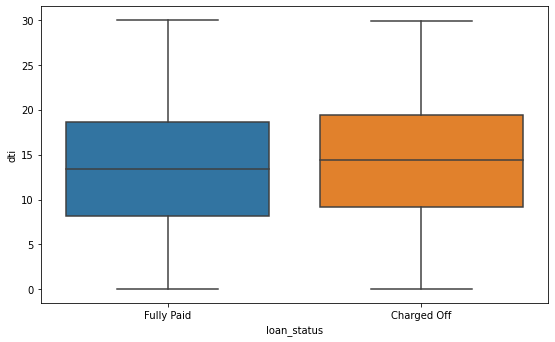

In [55]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'dti', data = data_loan)
plt.show()

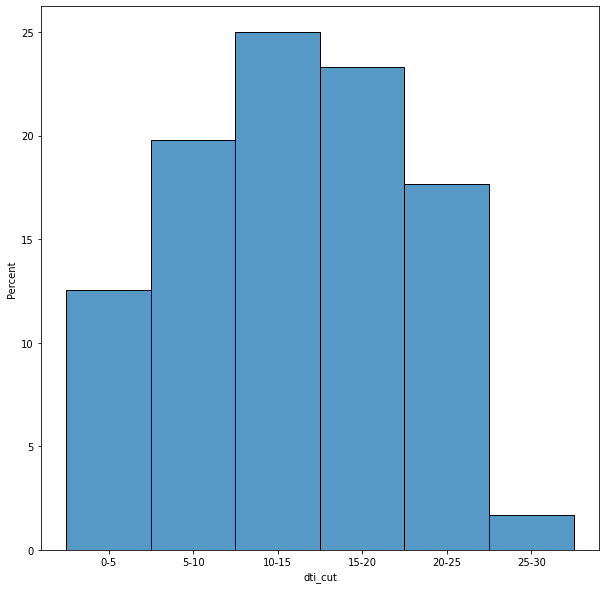

In [56]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
data_loan['dti_cut'] = pd.cut(data_loan['dti'], bins = 6, labels=['0-5', '5-10', '10-15', '15-20','20-25','25-30'])
sns.histplot(data_loan['dti_cut'], stat = 'percent')
plt.show()

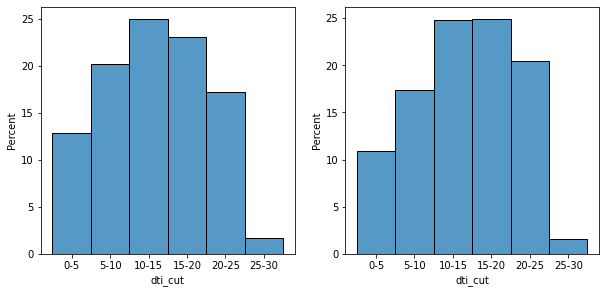

In [57]:
#Analysis the dti column with respect to loan status.

# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.histplot(data_loan[data_loan['loan_status']=='Fully Paid']['dti_cut'], stat = 'percent')
plt.subplot(2,2,2)
sns.histplot(data_loan[data_loan['loan_status']=='Charged Off']['dti_cut'], stat = 'percent')
plt.show()

dti is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
This ratio is highest between 10-15 for fully paid borrowers. But for charged off borrowers the highest ratio is between 10-20.

#### Issue year

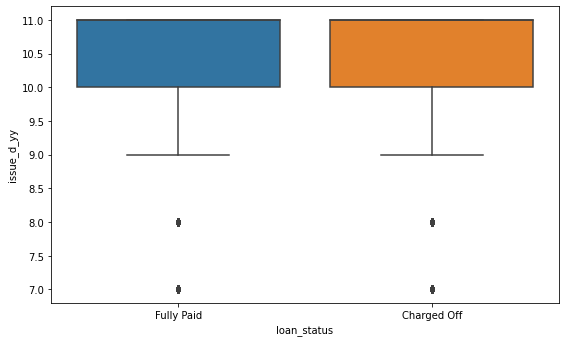

In [58]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'issue_d_yy', data = data_loan)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


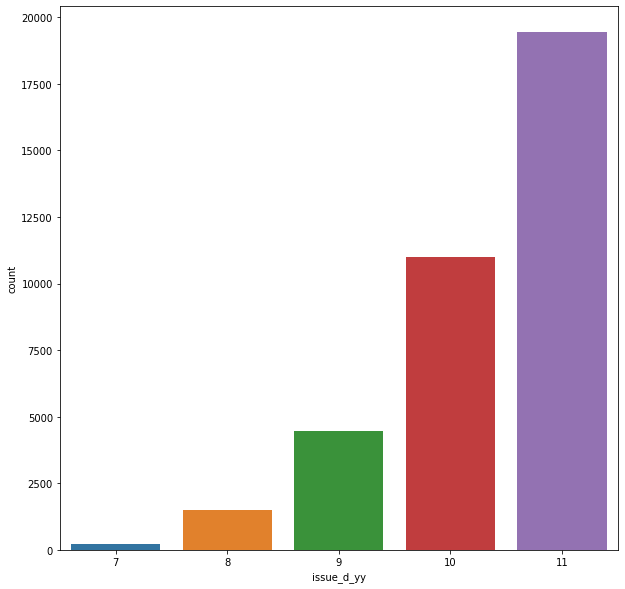

In [59]:
# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
sns.countplot(data_loan['issue_d_yy'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


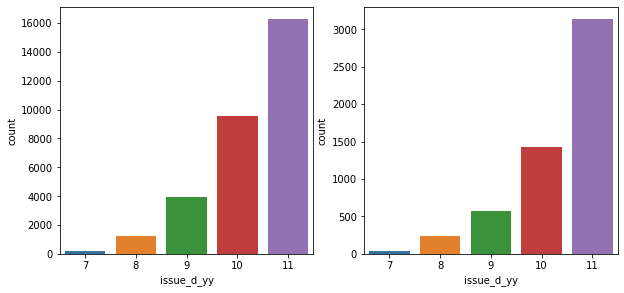

In [60]:
#Analysis the dti column with respect to loan status.

# referred from https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.countplot(data_loan[data_loan['loan_status']=='Fully Paid']['issue_d_yy'])
plt.subplot(2,2,2)
sns.countplot(data_loan[data_loan['loan_status']=='Charged Off']['issue_d_yy'])
plt.show()

The maximum number of loan approved both for defaulter and Fully paid borrowers are in 2011.

##### Public Record bankruptcies

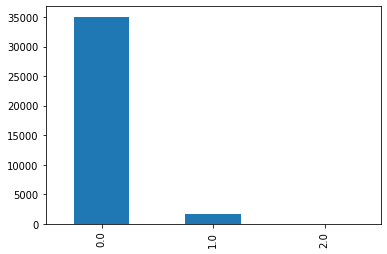

In [61]:
data_loan['pub_rec_bankruptcies'].value_counts().plot.bar()
plt.show()

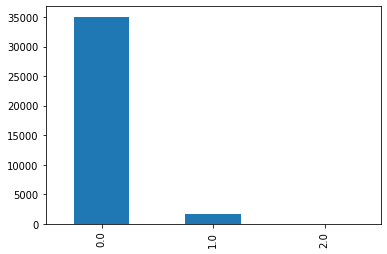

In [62]:
# Charded_off customers 

data_loan['pub_rec_bankruptcies'].value_counts().plot.bar()
plt.show()

For both Fully Paid and defaulter the highest number of derogatory record is 0.

### Univariate and Segmented Analysis of categorical feature.

###### Analysing "Term" column 

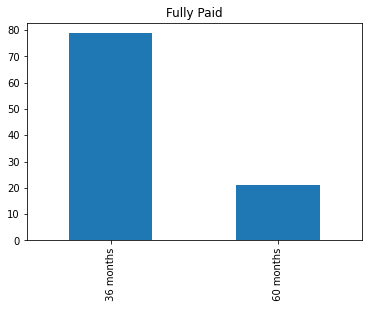

In [63]:
# Charded_off customers 
((data_loan[data_loan['loan_status']=='Fully Paid']['term'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()


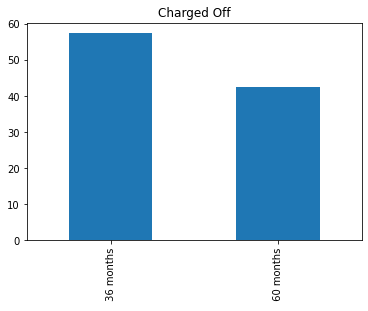

In [64]:
# Charded_off customers 
((data_loan[data_loan['loan_status']=='Charged Off']['term'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()


Both borrowers with loan status as Fully Paid and Charged off prefer 36 months. but 40% of the defaulter preffer 60 months terms were as only 20% of the fully paid borrower goes for 60 months terms as the no of payment on the loan.

###### Analysing "Grade" column 

In [65]:
print((data_loan[data_loan['loan_status']=='Fully Paid']['grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100)

B    31.127906
A    28.982258
C    19.704733
D    12.022033
E     5.719593
F     1.911868
G     0.531608
Name: grade, dtype: float64


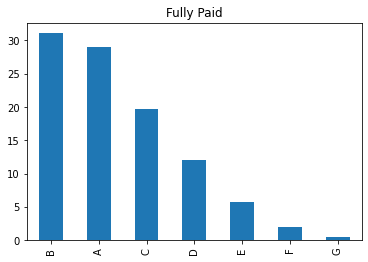

In [66]:
# univariate analysis of grade column for fully paid customer.

((data_loan[data_loan['loan_status']=='Fully Paid']['grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()

In [67]:
print((data_loan[data_loan['loan_status']=='Charged Off']['grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100)

B    25.406204
C    24.446086
D    19.940916
E    12.167651
A    10.949040
F     5.336041
G     1.754062
Name: grade, dtype: float64


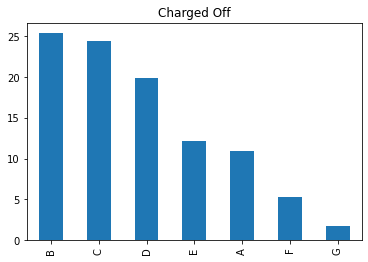

In [68]:
# univariate analysis of grade column for defaulters.

((data_loan[data_loan['loan_status']=='Charged Off']['grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()

From above graphs we can illustrate that majority of fully paid and defaulters belongs to Grade B. But there is difference in the rest grades. 
From the bar plot for fully paid customer it is evident that arround 28.66% of borrows belong to Grade A and then 3rd highest borrower belongs to Grade C. Whereas, for defaulters second highest grade is C with 23.80% followed by Grade D with 19.8%. 

Borrowers belong to Grade A is very less likely to be a defaulters.

###### Analysing "sub_grade" column 

In [69]:
print((data_loan[data_loan['loan_status']=='Fully Paid']['sub_grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100)

A4    8.246333
A5    7.641068
B3    7.455326
B5    6.866073
B4    6.449753
B2    5.386537
A3    5.268046
C1    5.232819
B1    4.970217
C2    4.902965
A2    4.409787
C3    3.686031
A1    3.417024
D2    3.071159
C4    3.029527
C5    2.853391
D3    2.616409
D1    2.328188
D4    2.120028
D5    1.886249
E1    1.562800
E2    1.329021
E3    1.159290
E4    0.880676
E5    0.787805
F1    0.627682
F2    0.480369
F3    0.352271
F4    0.297829
G1    0.185743
F5    0.153718
G2    0.128098
G4    0.108884
G3    0.067252
G5    0.041632
Name: sub_grade, dtype: float64


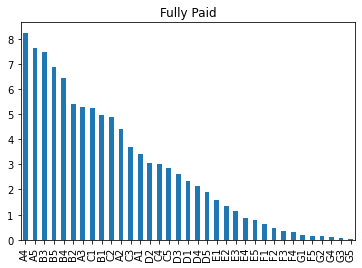

In [70]:
# univariate analysis of grade column for fully paid customer.

((data_loan[data_loan['loan_status']=='Fully Paid']['sub_grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()

In [71]:
print((data_loan[data_loan['loan_status']=='Charged Off']['sub_grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100)

B5    6.425406
C1    6.037666
B3    6.019202
B4    5.889956
C2    5.834564
C3    4.929838
D2    4.874446
D3    4.542097
B2    4.006647
A5    3.932792
C4    3.858936
D4    3.858936
C5    3.785081
D5    3.692762
E1    3.397341
A4    3.194239
B1    3.064993
D1    2.972674
E2    2.769572
E4    2.160266
E3    2.012555
A3    1.901773
E5    1.827917
F1    1.477105
A2    1.366322
F2    1.237075
F5    0.923191
F3    0.849335
F4    0.849335
G1    0.553914
A1    0.553914
G2    0.480059
G3    0.350812
G4    0.203102
G5    0.166174
Name: sub_grade, dtype: float64


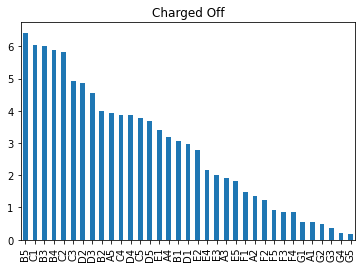

In [72]:
# univariate analysis of grade column for defaulters.

((data_loan[data_loan['loan_status']=='Charged Off']['sub_grade'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()

After performing the analysis on sub grades I found that the top 5 catergoies for fully paid borrowers are - A4,A5,B3,B4, and B5(when arranged in descending order) Whereas for charged off borrowers the sub grades are - B5,B3,C1,B4,C2 (arranged in descending order).
So, from the plot we can conclude that if a borrower belongs in A1-A5 gradesthen it is very less likely a borrower is defaulter. Similarly, if the borrower belongs to sub grades of C and D then it is more likely that the borrower is a defaulter. However, we cannot say the same for B sub-grades. 

###### Analysing "emp_length" column



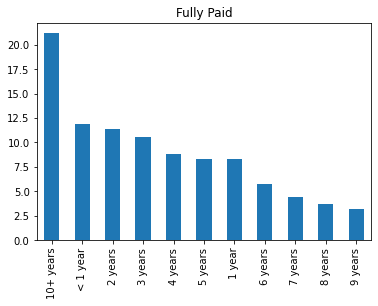

In [73]:
# univariate analysis of emp_length column for fully paid customer.

((data_loan[data_loan['loan_status']=='Fully Paid']['emp_length'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()

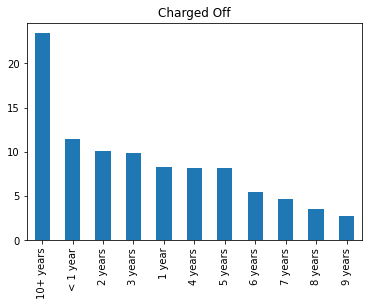

In [74]:
# univariate analysis of emp_length column for defaulters.

((data_loan[data_loan['loan_status']=='Charged Off']['emp_length'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()

From the above plot I can say that there is not much difference with the distribution of emp_length column for fully paid or charged off borrowers. 

###### Analysing "home_ownership" column



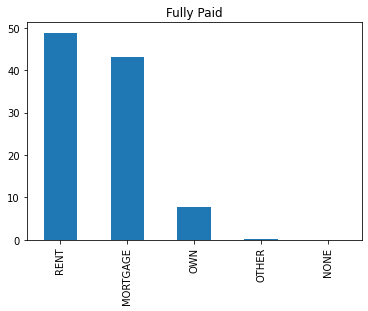

In [75]:
# univariate analysis of emp_length column for fully paid customer.

((data_loan[data_loan['loan_status']=='Fully Paid']['home_ownership'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()

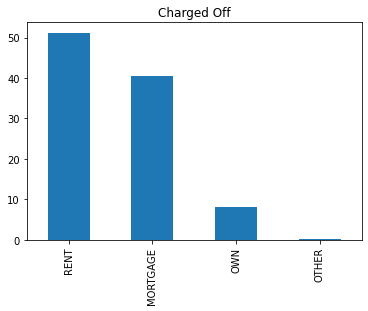

In [76]:
# univariate analysis of emp_length column for defaulters.

((data_loan[data_loan['loan_status']=='Charged Off']['home_ownership'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()

From the above plot I can say that there is not much difference with the distribution of home_ownership column for fully paid or charged off borrowers. 

###### Analysing "verification_status" column



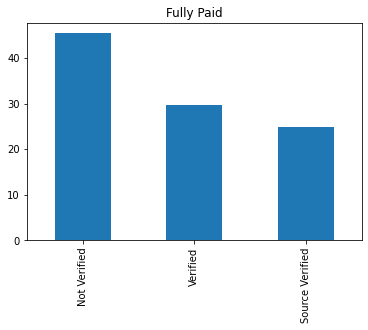

In [77]:
# univariate analysis of emp_length column for fully paid customer.

((data_loan[data_loan['loan_status']=='Fully Paid']['verification_status'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()

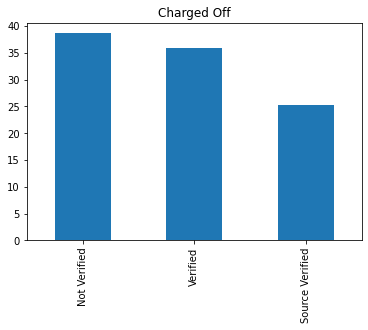

In [78]:
# univariate analysis of emp_length column for defaulters.

((data_loan[data_loan['loan_status']=='Charged Off']['verification_status'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()

From the plot, it is evident that the percentage of borrowers whose income source are vertified are more likely to be defaulter than fully paid borrowers.
The percentage of borrowers who are defaulters is same for both not varified and verified borrowers.

###### Analysing "purpose"



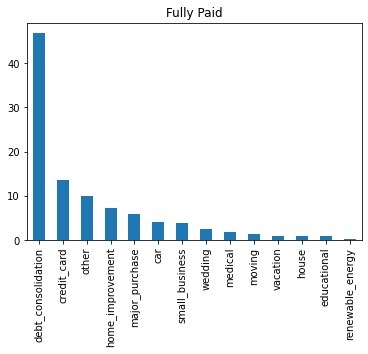

In [79]:
# univariate analysis of emp_length column for fully paid customer.

((data_loan[data_loan['loan_status']=='Fully Paid']['purpose'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()

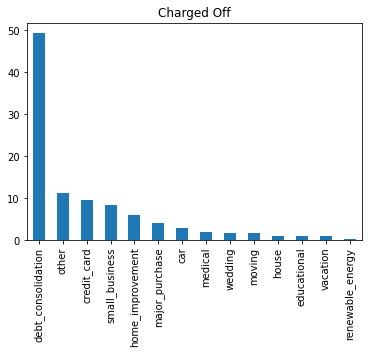

In [80]:
# univariate analysis of emp_length column for defaulters.

((data_loan[data_loan['loan_status']=='Charged Off']['purpose'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()

From the above plot I can say that there is not much difference with the distribution of home_ownership column for fully paid or charged off borrowers. Almost 50% of the time the loan taken by the charged off borrower is for debt_consolidation.

###### Analysing "issue_d_month"



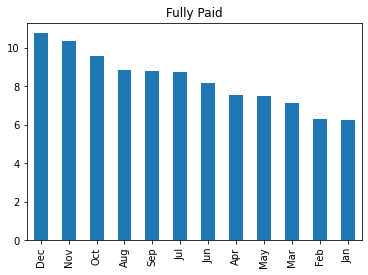

In [81]:
# univariate analysis of emp_length column for fully paid customer.

((data_loan[data_loan['loan_status']=='Fully Paid']['issue_d_month'].value_counts()/len(data_loan[data_loan['loan_status']=='Fully Paid']))*100).plot.bar()
plt.title("Fully Paid")
plt.show()

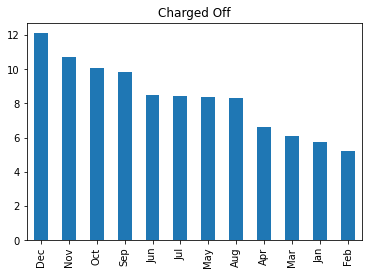

In [82]:
# univariate analysis of emp_length column for defaulters.

((data_loan[data_loan['loan_status']=='Charged Off']['issue_d_month'].value_counts()/len(data_loan[data_loan['loan_status']=='Charged Off']))*100).plot.bar()
plt.title("Charged Off")
plt.show()

From the analysis it is evident there is not much information I can extract from The month the loan was funded. 

### Conclusion of segmented univariate Analysis

* If the funded amount invested by the investor is between 0-5k then more than 25% of the applicant are defaulters.
* More than 25% of the defaulter applicants paying loan with a interest rate between 9-12%.
* More than 40% of the applicants whose annual income is between 31k to 58k are defaulters.
* Approximately 25%of the applicants are defaulters if there debt to income ratio (dti) is between 10-20.
* highest number of loan issued was in the year 2011 and in the month december.
* Applicant belong to grade A is less likely to be a defaulter.
* Almost 50% of the loan taken by the charged off borrower is for debt_consolidation.
* Almost 40% of the charged off applicants opt for 60 months term to pay their loan.

## Numerical -Numerical Bivariate Analysis

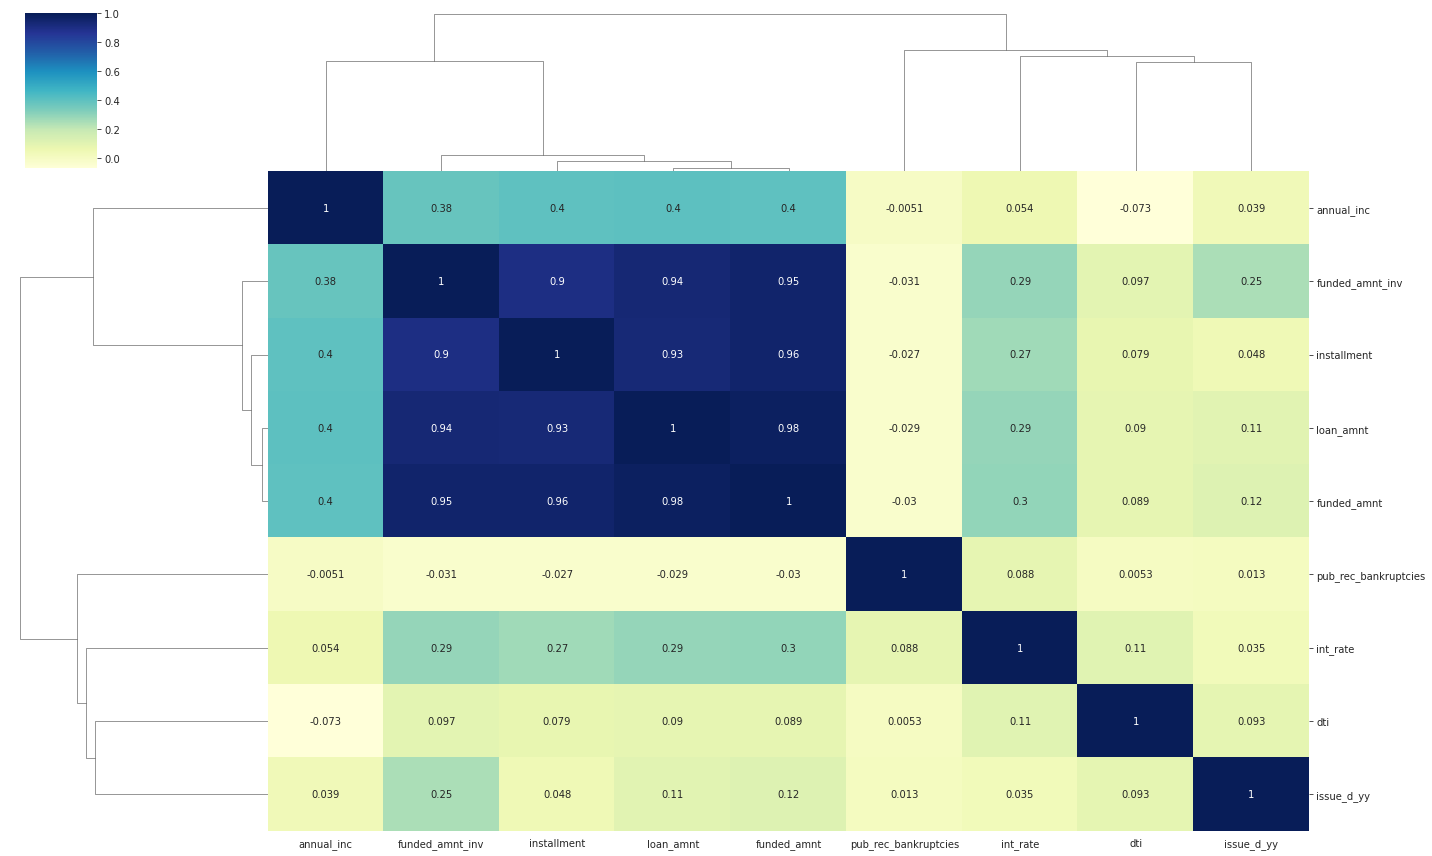

In [83]:
sns.set_style("whitegrid")
sns.clustermap(data=data_loan.corr(), cmap='YlGnBu', figsize=(20,12), annot=True)
plt.show()

From the above heat I can conclude the below listed points
* The columns - "loan amount", "funded amount", "funded amount by inventor", "installment" are highly correlated to each other.
* The issue_d_yy and interest rate are positively correlated to all the variables.
* The columns - "loan amount", "funded amount", "funded amount by inventor", "installment" are slightly correlated to annual income and interest rate.
* dti is negatively correlated to annual income.
* A cluster is created by issue_d_yy, int_rate and annual_inc.
* pub_rec_bankruptcies is negatively related to "loan amount", "funded amount", "funded amount by inventor", "installment" but positively related to interest rate, issue date year, debt to income (dti).

### Bivariate Analysis

In [84]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36642 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             36642 non-null  int64   
 1   funded_amnt           36642 non-null  int64   
 2   funded_amnt_inv       36642 non-null  float64 
 3   term                  36642 non-null  object  
 4   int_rate              36642 non-null  float64 
 5   installment           36642 non-null  float64 
 6   grade                 36642 non-null  object  
 7   sub_grade             36642 non-null  object  
 8   emp_length            35628 non-null  object  
 9   home_ownership        36642 non-null  object  
 10  annual_inc            36642 non-null  float64 
 11  verification_status   36642 non-null  object  
 12  loan_status           36642 non-null  object  
 13  purpose               36642 non-null  object  
 14  dti                   36642 non-null  float64 
 15  pu

### Categorical-Numerical Bivariate Analysis

#### Funded Amount Invested

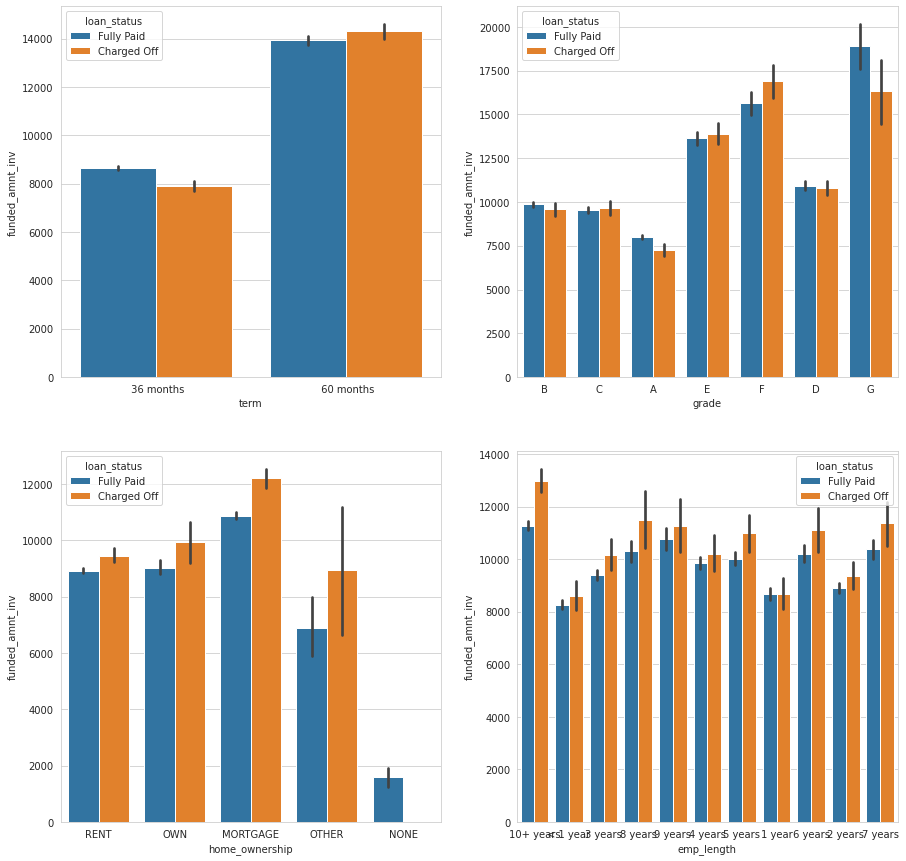

In [85]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "funded_amnt_inv", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "funded_amnt_inv", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "funded_amnt_inv", data = data_loan, hue ="loan_status")
plt.subplot(224)
sns.barplot(x= "emp_length", y= "funded_amnt_inv", data = data_loan, hue ="loan_status")


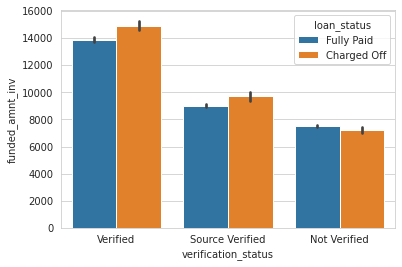

In [86]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "funded_amnt_inv", data = data_loan, hue ="loan_status")

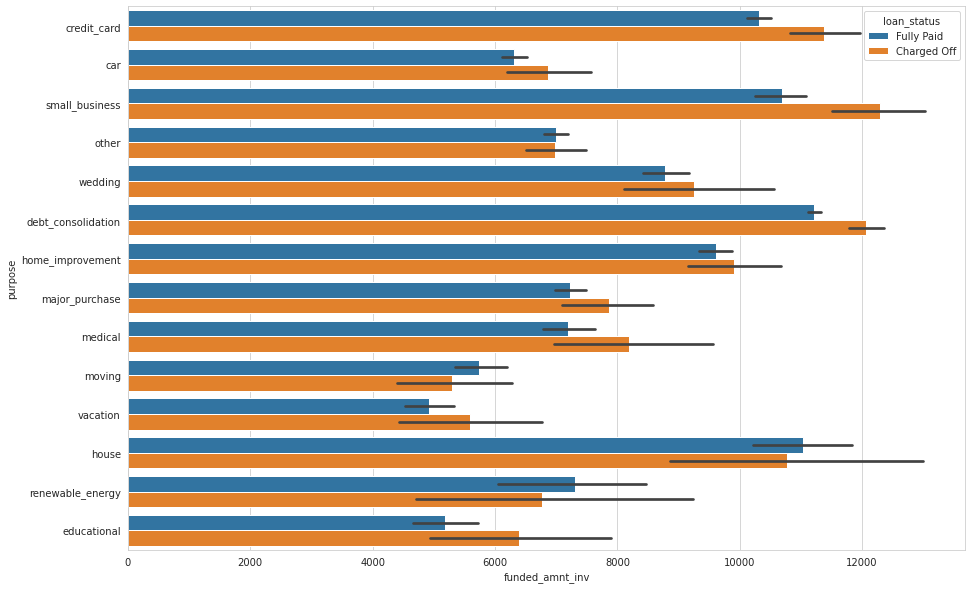

In [87]:
plt.figure(figsize = (15,10))
sns.barplot(x= "funded_amnt_inv", y= "purpose", data = data_loan, hue ="loan_status")

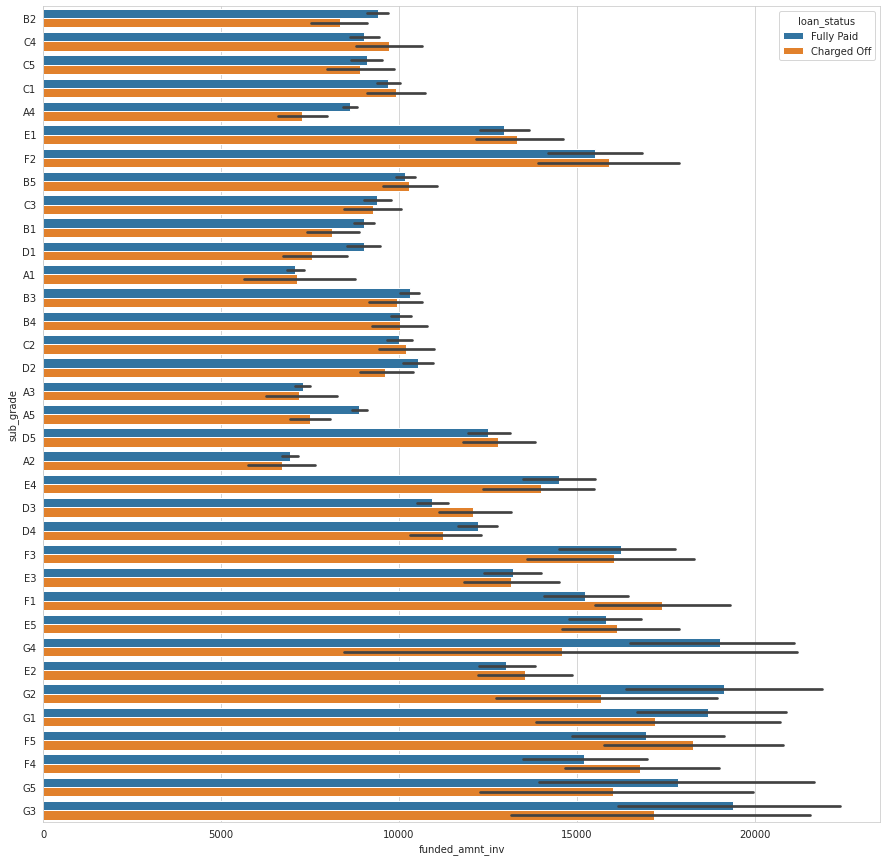

In [88]:
plt.figure(figsize = (15,15))
sns.barplot(x= "funded_amnt_inv", y= "sub_grade", data = data_loan, hue ="loan_status")

From the above graphs, I can conclude the below points:
* Investor funded loan around 17k-18k to a borrower belongs to grade F are more likely to be a defaulter. Whereas applicants belongs to grade G and investor funded loan amount between 18k-20k fully pay the bill.
* Investor funded loan around 15k-20k to a borrower belongs to sub grade F5 are more likely to be a defaulter. Whereas, Investor funded loan above 20k to a applicant belongs to sub grade G2 fully pay the loan.
* Investor funded loan more than 12k to a borrower with a mortgage home ownership can be a defaulter.
* Borrowers taken loan for the purpose of small business and funded by investor between 10-12k are defaulters
* Borrowers with more than 10 years of experience get investor funded loan between 12k and 14k become defaulters.

#### Loan Amount

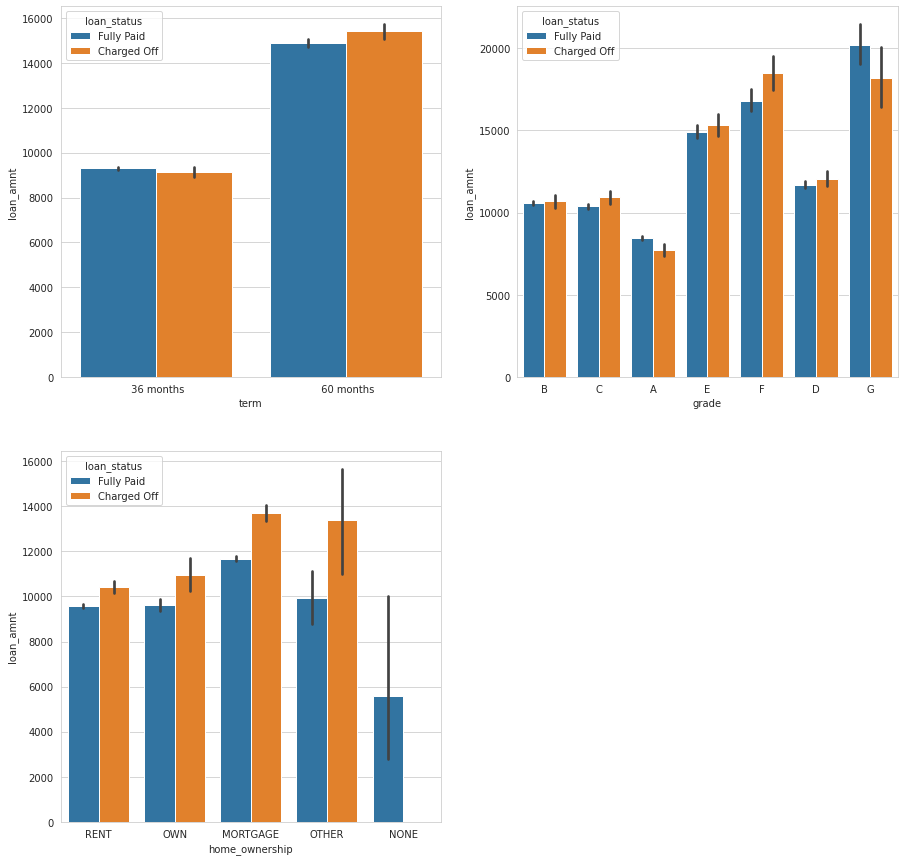

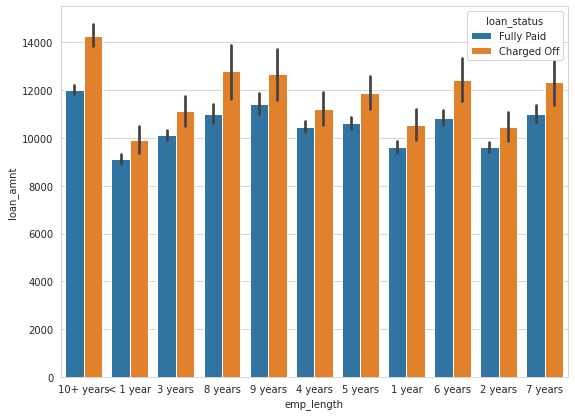

In [89]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "loan_amnt", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "loan_amnt", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "loan_amnt", data = data_loan, hue ="loan_status")
plt.figure(figsize = (20,15))
plt.subplot(224)
sns.barplot(x= "emp_length", y= "loan_amnt", data = data_loan, hue ="loan_status")


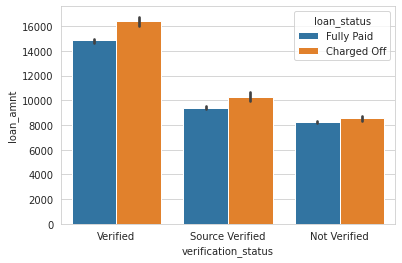

In [90]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "loan_amnt", data = data_loan, hue ="loan_status")

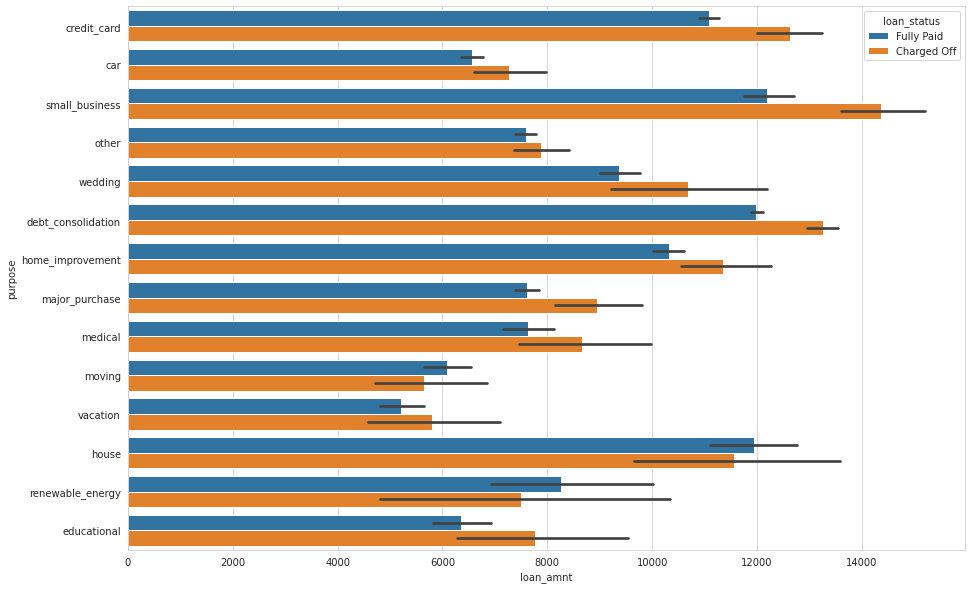

In [91]:
plt.figure(figsize = (15,10))
sns.barplot(x= "loan_amnt", y= "purpose", data = data_loan, hue ="loan_status")

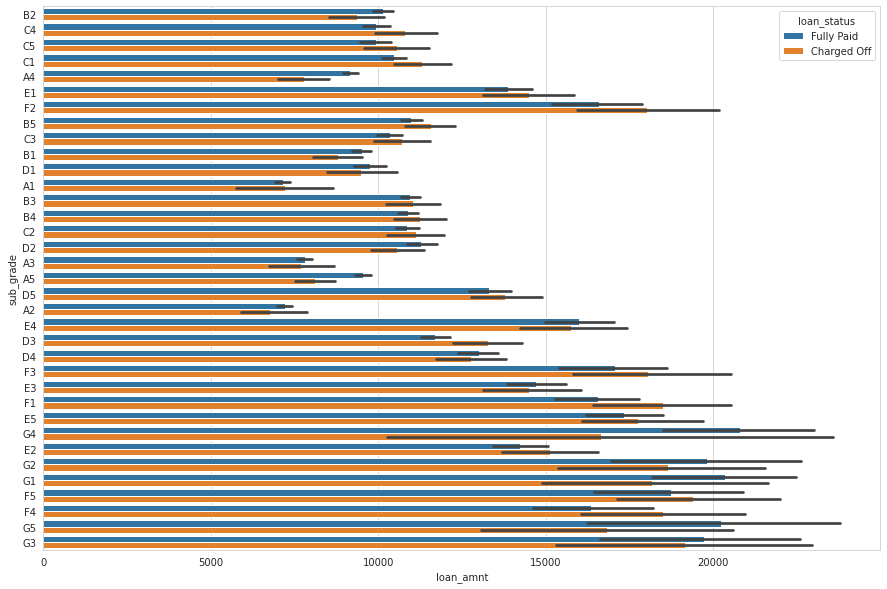

In [92]:
plt.figure(figsize = (15,10))
sns.barplot(x= "loan_amnt", y= "sub_grade", data = data_loan, hue ="loan_status")

From the above graphs, I can conclude the below points:
* Borrowers applied for  loan amount around 17k-18k and belongs to grade F are more likely to be a defaulter. Whereas applicants belongs to grade G and applied for loan amount above 20k fully pay the bill.
* Brrowers asked for loan amount between 12-14k to a borrower with a mortgage home ownership can be a defaulter. below 12k there is a 50% probability of applicant can be defaulter.
* loan applied for the purpose of small business and amount borrowed between 14-16k are defaulters. 
* Borrowers with more than 10 years of experience applied for loan in the range from 12- 14k become defaulters.
* loan applied above 20k and belongs to sub grade F5 are more likely to be a defaulter. Whereas, applicant loan above 20k belongs to sub grade G2 fully pay the loan.

#### Installment

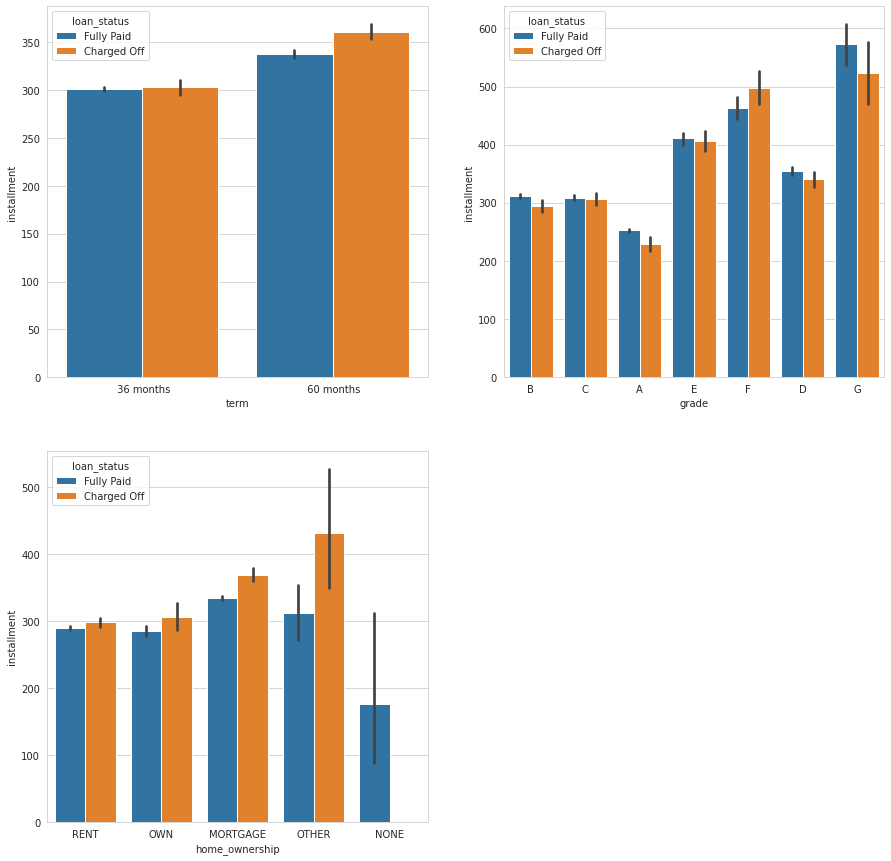

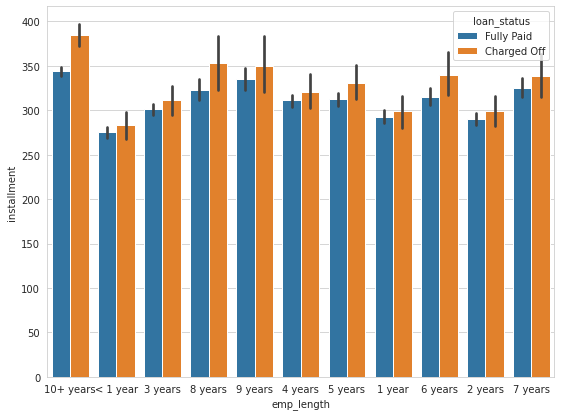

In [93]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "installment", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "installment", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "installment", data = data_loan, hue ="loan_status")
plt.figure(figsize = (20,15))
plt.subplot(224)
sns.barplot(x= "emp_length", y= "installment", data = data_loan, hue ="loan_status")


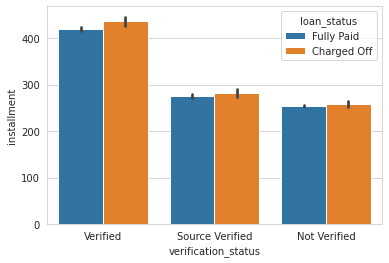

In [94]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "installment", data = data_loan, hue ="loan_status")

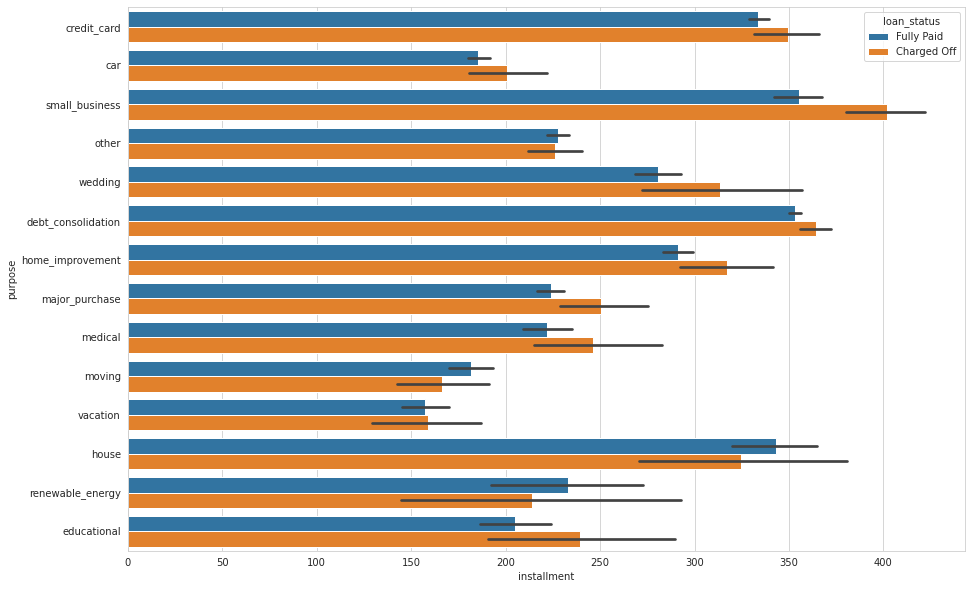

In [95]:
plt.figure(figsize = (15,10))
sns.barplot(x= "installment", y= "purpose", data = data_loan, hue ="loan_status")

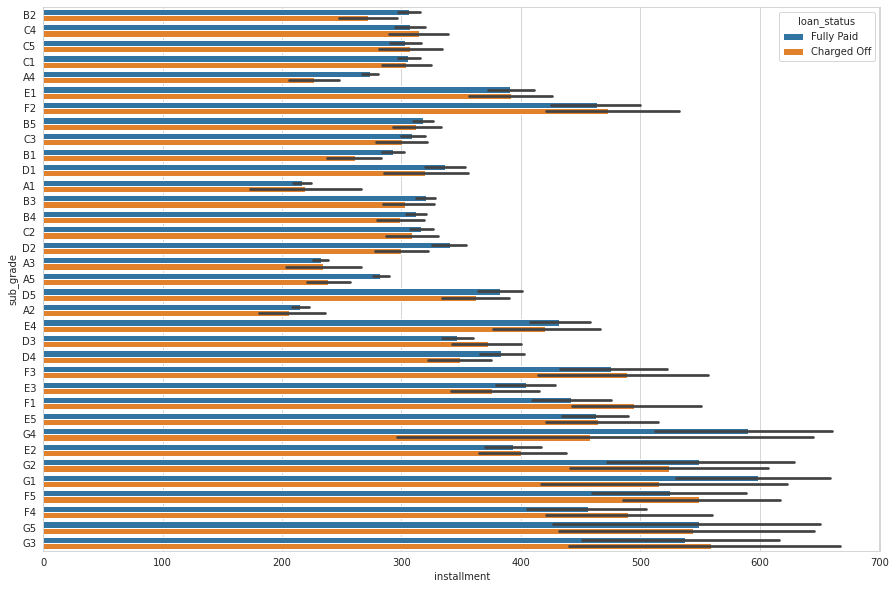

In [96]:
plt.figure(figsize = (15,10))
sns.barplot(x= "installment", y= "sub_grade", data = data_loan, hue ="loan_status")

From the above graphs, I can conclude the below points:
* Applicant belong to grade G and installment above 520 fully pay their loan however, Applicants belong to grade F and installment above 490 can become defaulters.
* applicants with installment above 400 and with other as home ownership can be a defaulter. However, Borrower with intallments between 300-350 and have other as home ownership are more likely to pay the loan.
* loan asked for the purpose of small business and have monthly installment above 400 are defaulters
* applicants with more than 10 years of experience and monthy installments between 360-390 can become defaulters. However, Borrowers with installments payment close to 350 are Fully payers.
*applicants with monthly installment approximately between 570-600 and belongs to sub grade G5 and F5 are more likely to be a defaulter. Whereas, applicant monthly install above 470 belongs to sub grade G4 fully pay the loan.

#### Annual Income

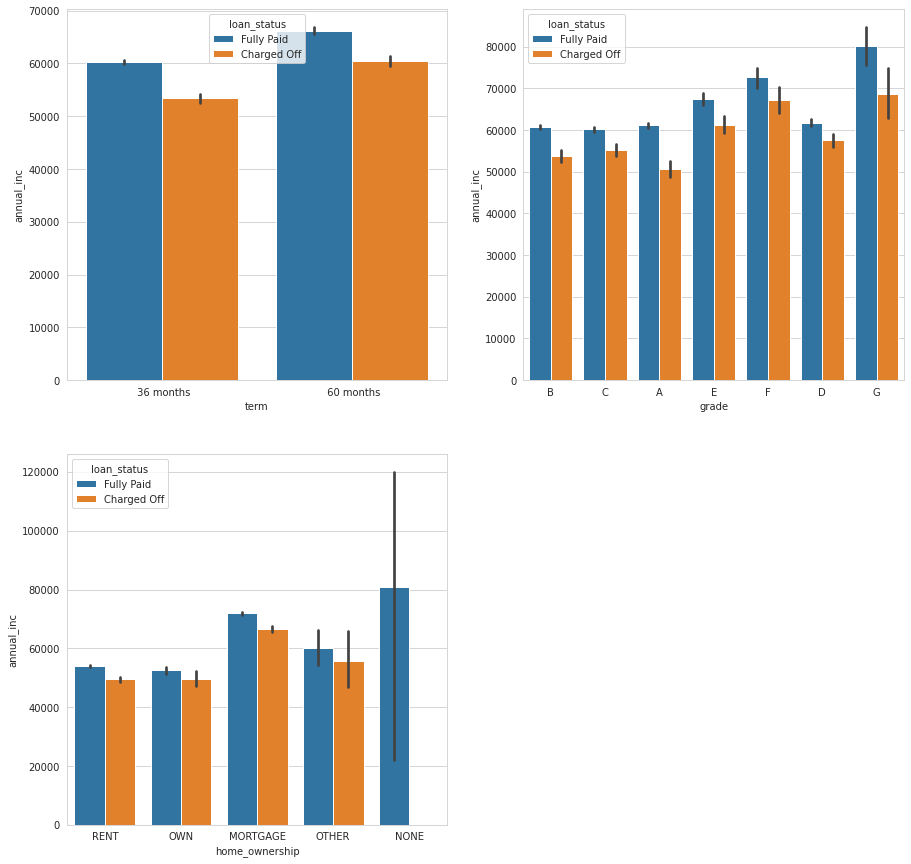

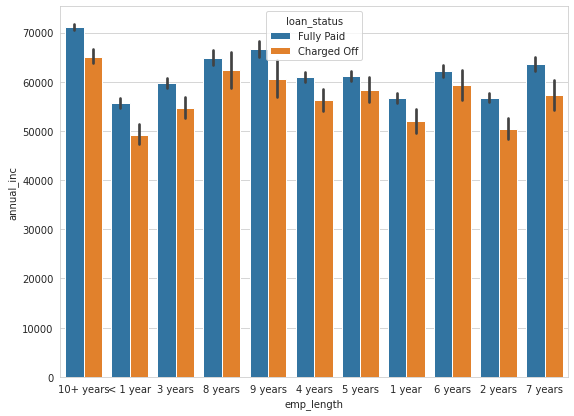

In [97]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "annual_inc", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "annual_inc", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "annual_inc", data = data_loan, hue ="loan_status")
plt.figure(figsize = (20,15))
plt.subplot(224)
sns.barplot(x= "emp_length", y= "annual_inc", data = data_loan, hue ="loan_status")


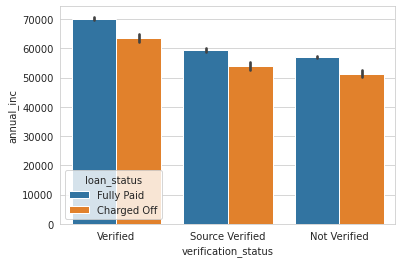

In [98]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "annual_inc", data = data_loan, hue ="loan_status")

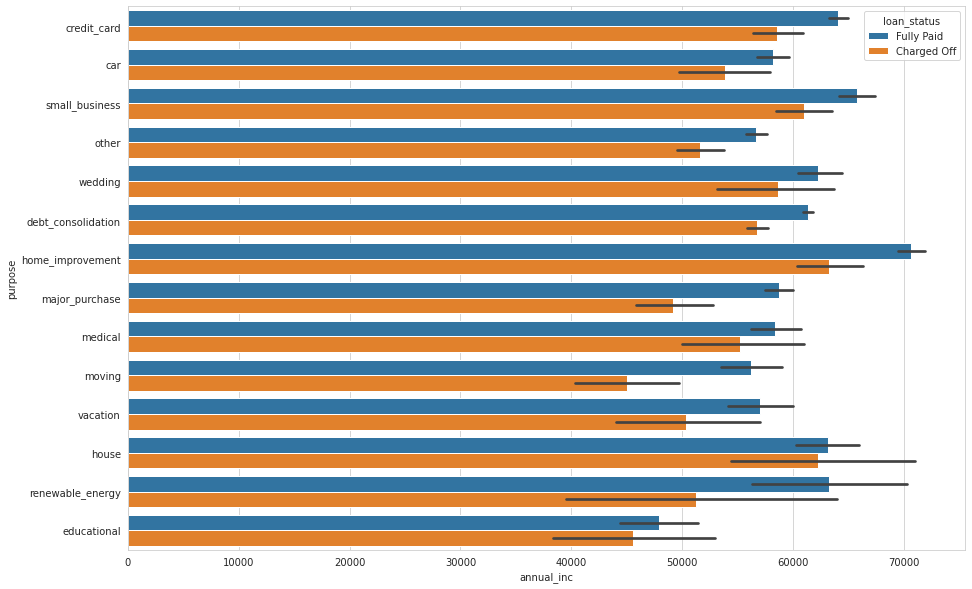

In [99]:
plt.figure(figsize = (15,10))
sns.barplot(x= "annual_inc", y= "purpose", data = data_loan, hue ="loan_status")

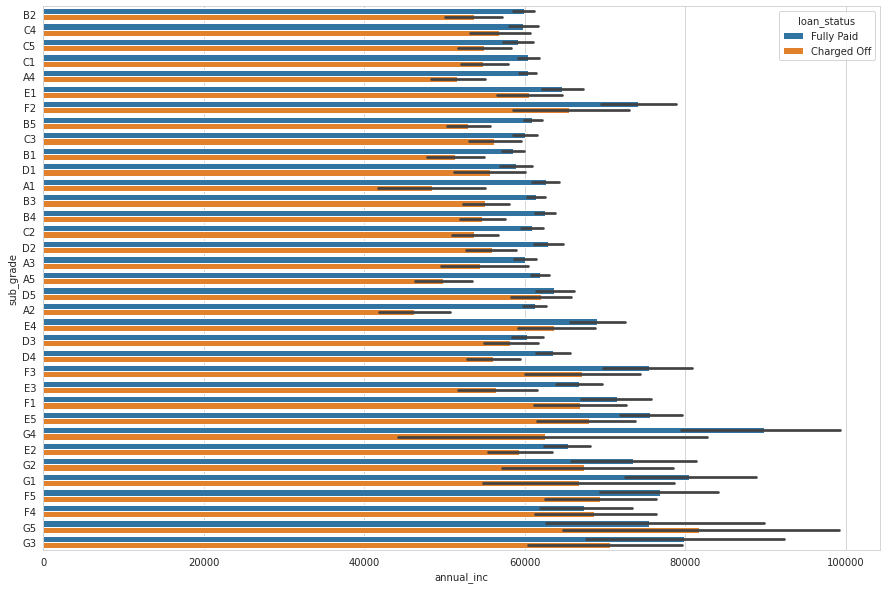

In [100]:
plt.figure(figsize = (15,10))
sns.barplot(x= "annual_inc", y= "sub_grade", data = data_loan, hue ="loan_status")

From the above graphs, I can conclude the below points:

* Applicants with annual income above 80k has highest probablility to fully pay the loan.
* Applicant with annual income upto 80k and belong to grade F can become a defaulter.
* Applicants with annual income below 80k and with Mortage as home ownership can be a defaulter. However, above 80k and Mortage as home ownership are more likely to pay the loan.
* loan asked for the purpose of Home improvement and with annual salary approximately below 79k can become defaulters.
* Applicants with more than 10 years of experience and annual income below 72k can become defaulters.
* applicants withannual income above 1L and belongs to sub grade G4 more likely to be a defaulter. Whereas, applicant with annual income above 1L and belong to same group are more likely to pay the loan.

#### Interest Rate

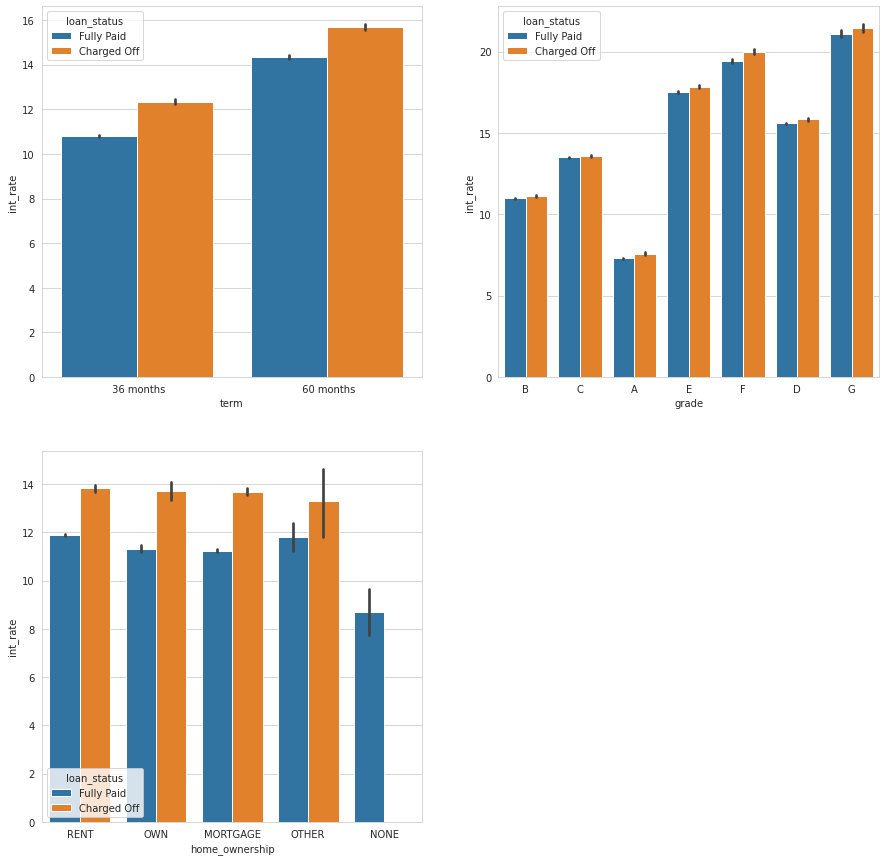

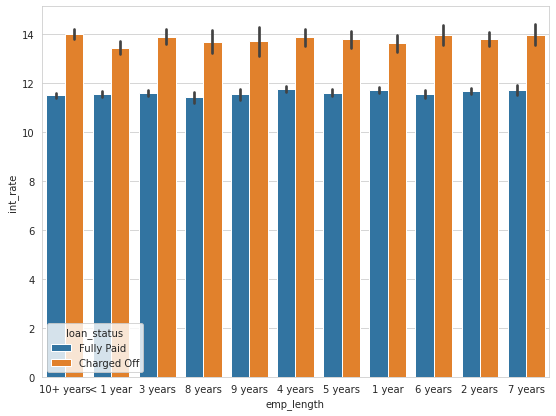

In [101]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "int_rate", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "int_rate", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "int_rate", data = data_loan, hue ="loan_status")
plt.figure(figsize = (20,15))
plt.subplot(224)
sns.barplot(x= "emp_length", y= "int_rate", data = data_loan, hue ="loan_status")


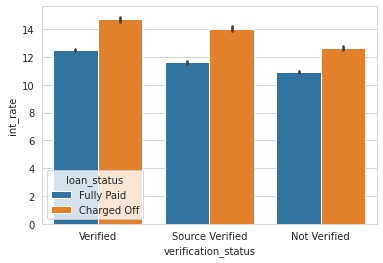

In [102]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "int_rate", data = data_loan, hue ="loan_status")

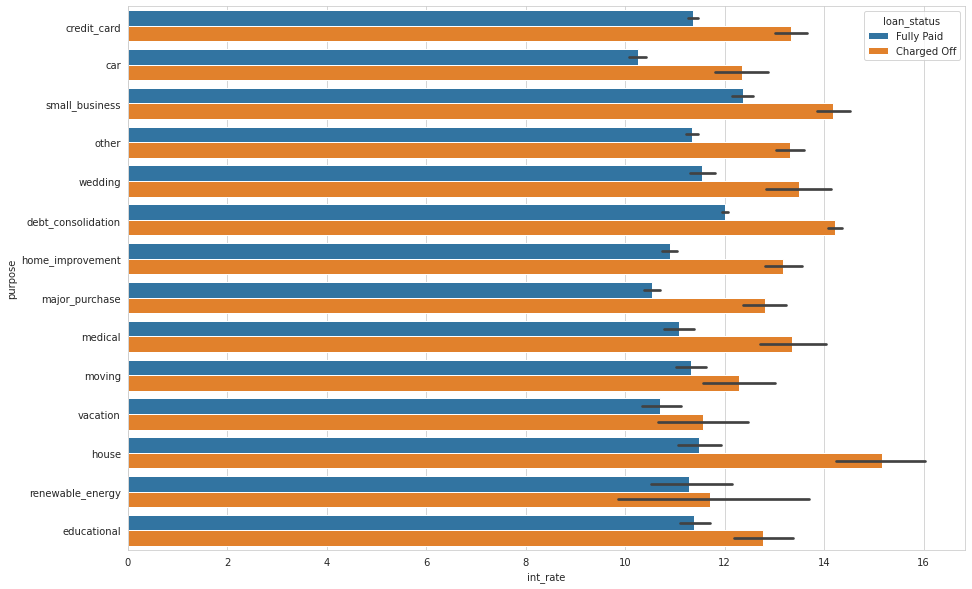

In [103]:
plt.figure(figsize = (15,10))
sns.barplot(x= "int_rate", y= "purpose", data = data_loan, hue ="loan_status")

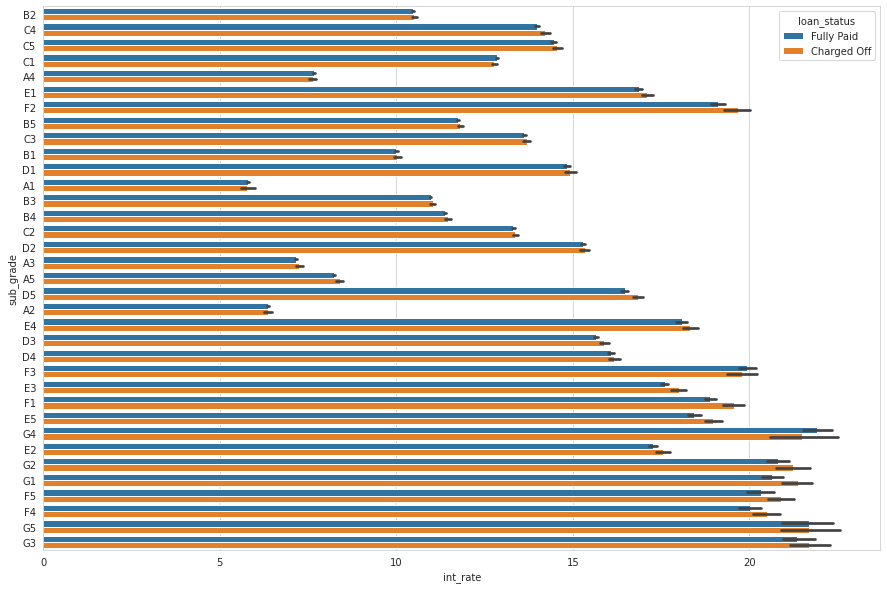

In [104]:
plt.figure(figsize = (15,10))
sns.barplot(x= "int_rate", y= "sub_grade", data = data_loan, hue ="loan_status")

From the above graphs, I can conclude the below points:

* Applicants with interest rate above 12% are very much likely to become a defaulter.
* Applicants with any employment experience paying loan with interest rate above or equal to 12%  become a defaulter.
* Applicants applied loan for any purpose if paying loan with interest rate above or equal to 12%  become a defaulter.
* Applicants with vertification status as non verified/source verified paying loan with interest rate above or equal to 12%  become a defaulter. However, for verified status if the rate is higher than 12.5% then the applicant become a defaulter.
* There is no evident clasification between fully paid and charged off applicants for the grade and sub-grade variable with respect to the insterest rate.


### Recommendation

*  LC should decrease the interest rate in order to decrease the probability of defulters.
* LC should give more loans to the applicants whose annual salary is above 80k.



#### dti

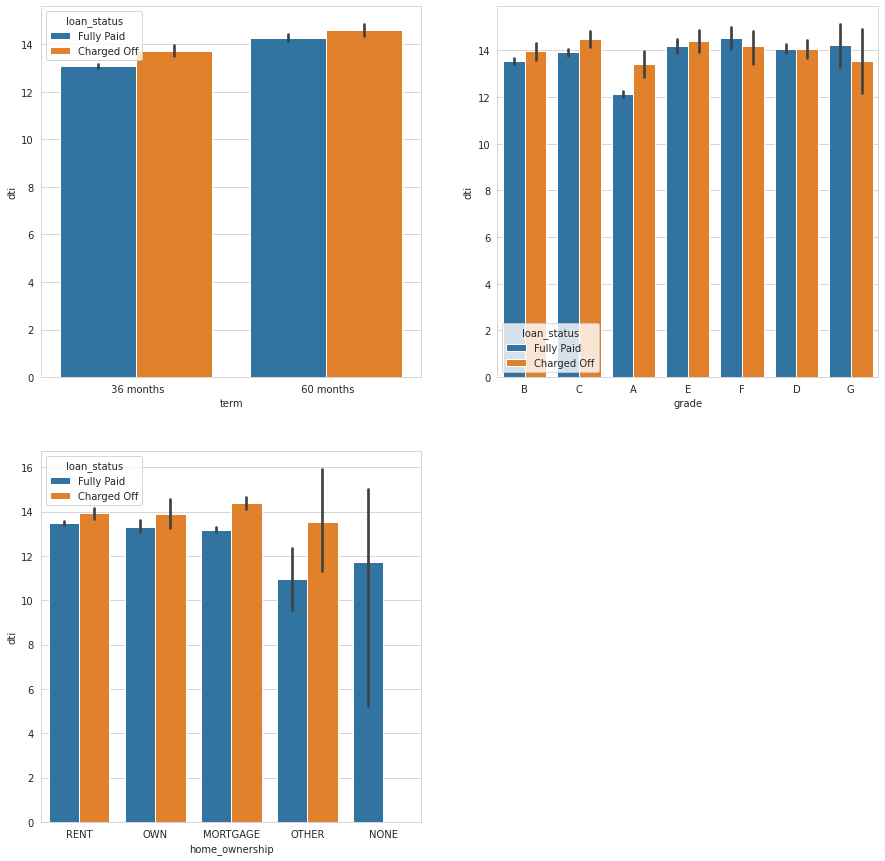

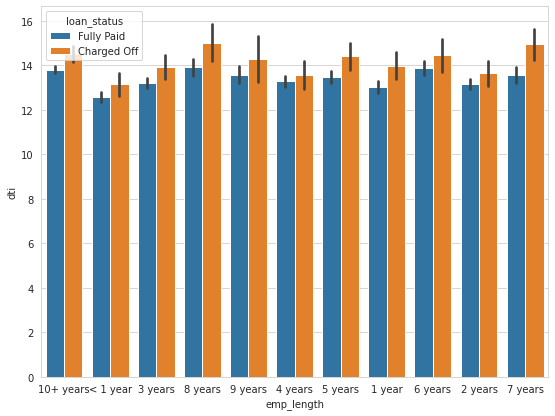

In [105]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "dti", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "dti", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "dti", data = data_loan, hue ="loan_status")
plt.figure(figsize = (20,15))
plt.subplot(224)
sns.barplot(x= "emp_length", y= "dti", data = data_loan, hue ="loan_status")


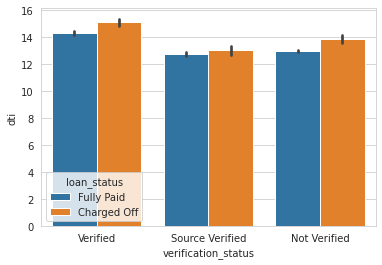

In [106]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "dti", data = data_loan, hue ="loan_status")

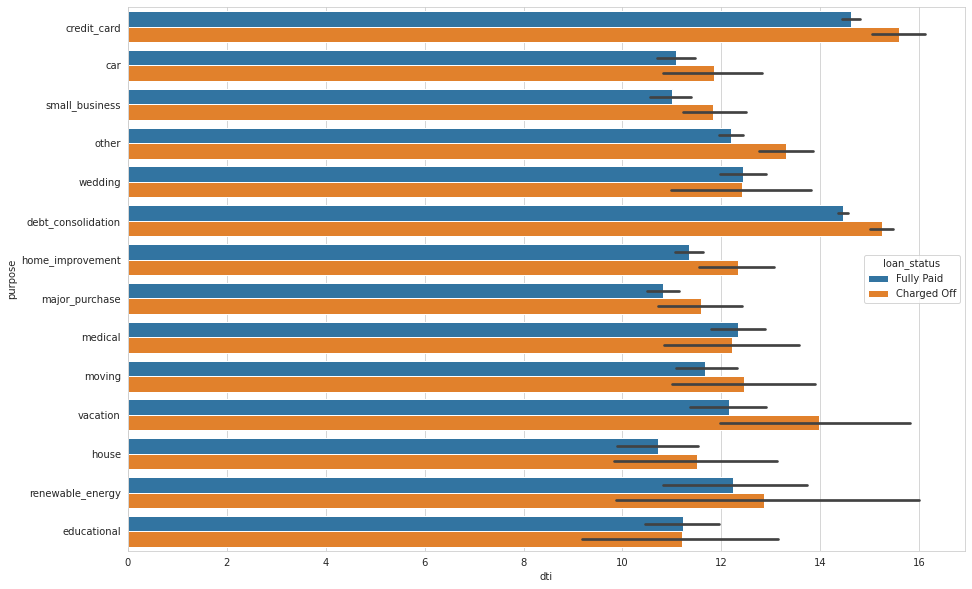

In [107]:
plt.figure(figsize = (15,10))
sns.barplot(x= "dti", y= "purpose", data = data_loan, hue ="loan_status")

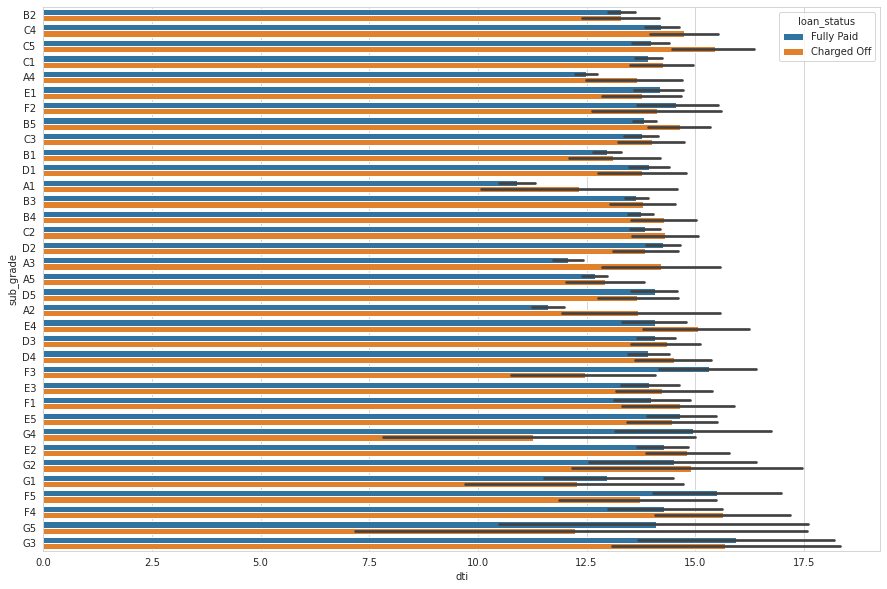

In [108]:
plt.figure(figsize = (15,10))
sns.barplot(x= "dti", y= "sub_grade", data = data_loan, hue ="loan_status")

From the above graphs, I can conclude the below points:

* Applicants with any employment experience dti above or equal to 14  become a defaulter.
* Applicants applied loan for purpose other than credit card and debt_ consolidation have dti above 12.5 have a risk of becoming a defaulter.
* Applicants with vertification status as non verified/source verified have dti above or equal to 12.5  become a defaulter. However, for verified status if dti is higher than 14 then the applicant can become a defaulter.
* If the dti of a applicant is above 14.00 and grade is C then the applicant can become a defaulter. However, for Grade F and G applicant with dti higher than 14 can fully pay the loan.
* For all sub grade of grade C the probability of applicant becoming defaulter is higher. But for sub grade F3 and dti greater than 13.00 the probability of applicant fully pay the loan is higher.


#### Public Record of Bankruptcies

In [109]:
data_loan['pub_rec_bankruptcies']= data_loan['pub_rec_bankruptcies'].astype(int)
print(data_loan['pub_rec_bankruptcies'].dtype)
print(data_loan['pub_rec_bankruptcies'].value_counts())

int64
0    35038
1     1599
2        5
Name: pub_rec_bankruptcies, dtype: int64


Converting the column pub_rec_bankruptcies as integer because the number of recorded bankruptcies cannot be 1.2 or 1.75. It will be in 0,1, 2, 3.

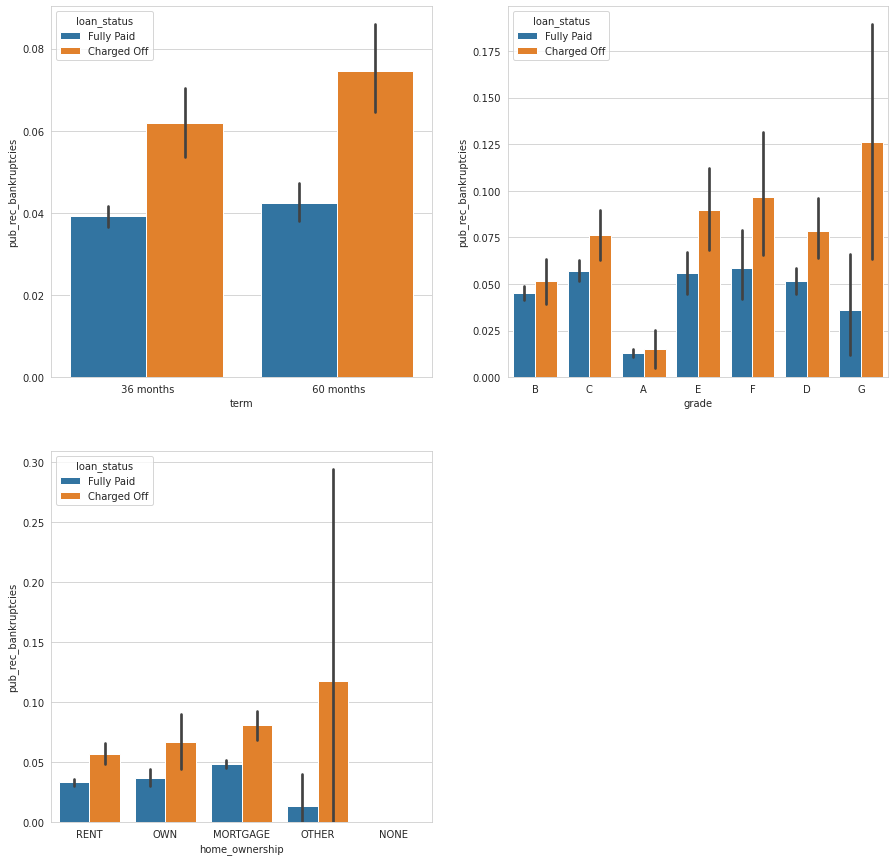

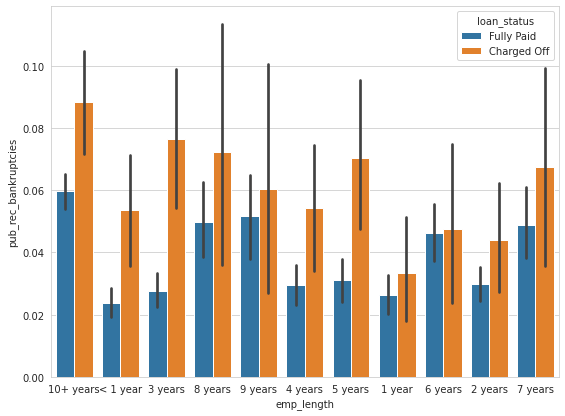

In [110]:
# https://seaborn.pydata.org/tutorial/categorical.html

plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "pub_rec_bankruptcies", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "pub_rec_bankruptcies", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "pub_rec_bankruptcies", data = data_loan, hue ="loan_status")
plt.figure(figsize = (20,15))
plt.subplot(224)
sns.barplot(x= "emp_length", y= "pub_rec_bankruptcies", data = data_loan, hue ="loan_status")


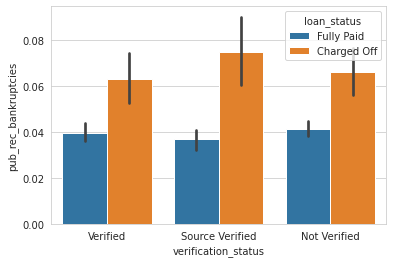

In [111]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "pub_rec_bankruptcies", hue ="loan_status", data = data_loan)

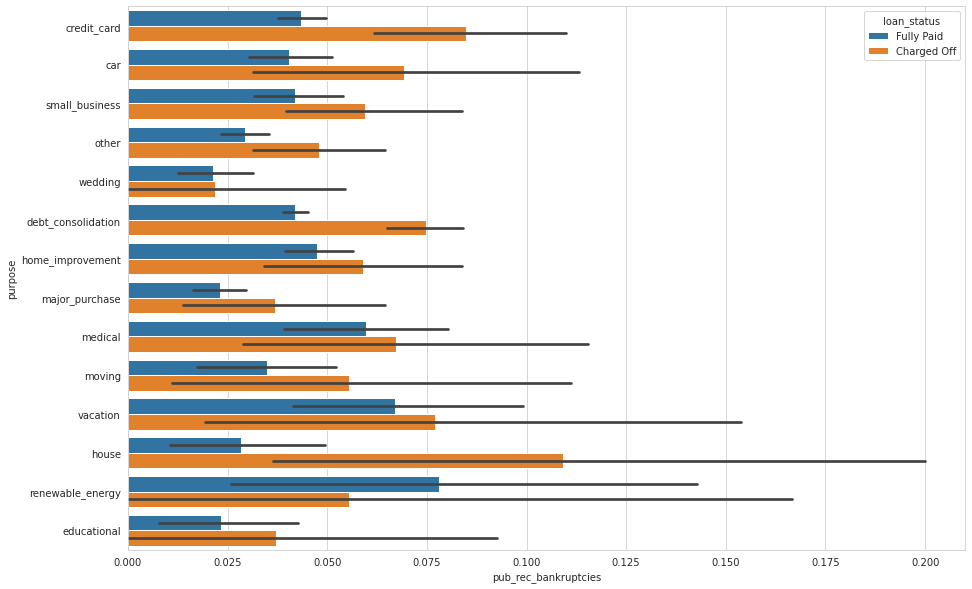

In [112]:
plt.figure(figsize = (15,10))
sns.barplot(x= "pub_rec_bankruptcies", y= "purpose", data = data_loan, hue ="loan_status")

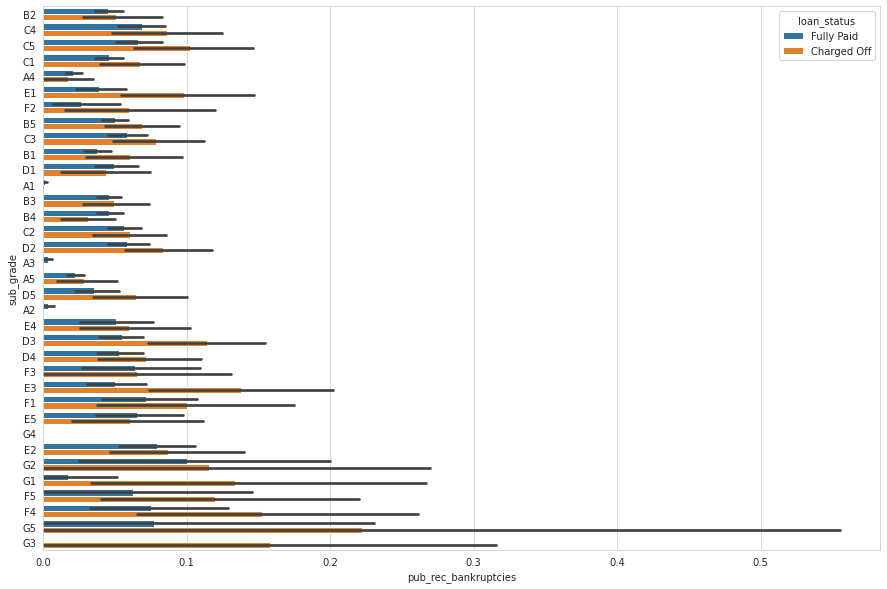

In [113]:
plt.figure(figsize = (15,10))
sns.barplot(x= "pub_rec_bankruptcies", y= "sub_grade", data = data_loan, hue ="loan_status")

From the above graphs, I can conclude the below point:

* Applicants with greater than 0 are more to prone to become defaulter.


In [114]:
data_loan['issue_d_yy'].value_counts()

11    19441
10    11007
9      4475
8      1489
7       230
Name: issue_d_yy, dtype: int64

#### Issue date year

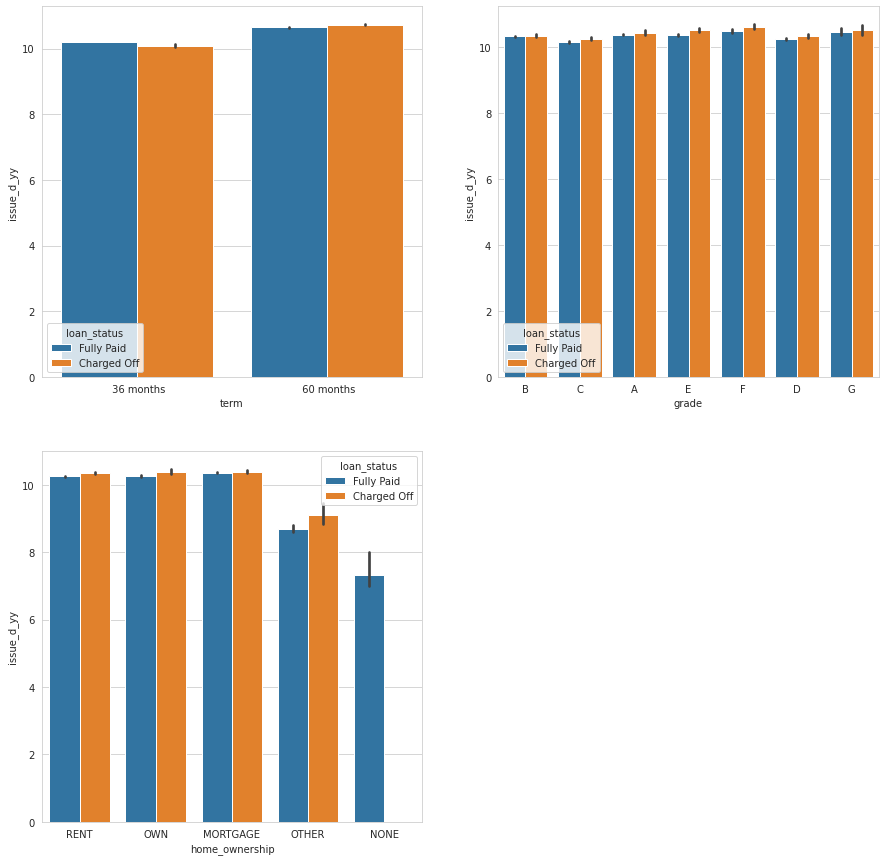

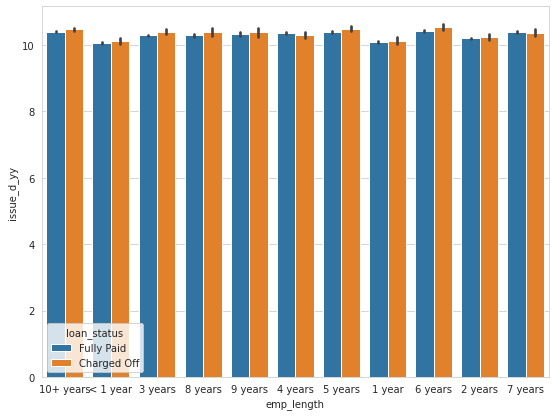

In [115]:
# https://seaborn.pydata.org/tutorial/categorical.html

plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x= "term", y= "issue_d_yy", data = data_loan, hue ="loan_status")
plt.subplot(222)
sns.barplot(x= "grade", y= "issue_d_yy", data = data_loan, hue ="loan_status")
plt.subplot(223)
sns.barplot(x= "home_ownership", y= "issue_d_yy", data = data_loan, hue ="loan_status")
plt.figure(figsize = (20,15))
plt.subplot(224)
sns.barplot(x= "emp_length", y= "issue_d_yy", data = data_loan, hue ="loan_status")


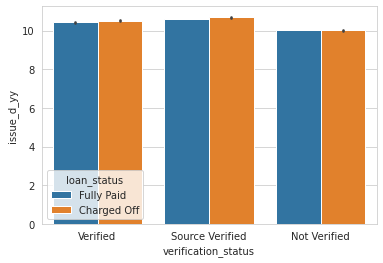

In [116]:
#plt.figure(figsize = (25,25))
sns.barplot(x= "verification_status", y= "issue_d_yy", hue ="loan_status", data = data_loan)

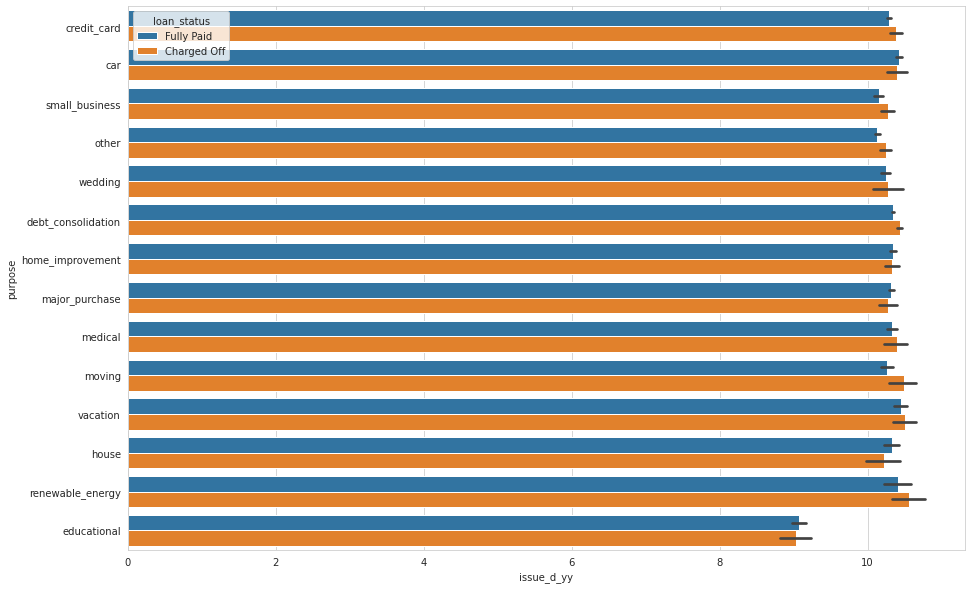

In [117]:
plt.figure(figsize = (15,10))
sns.barplot(x= "issue_d_yy", y= "purpose", data = data_loan, hue ="loan_status")

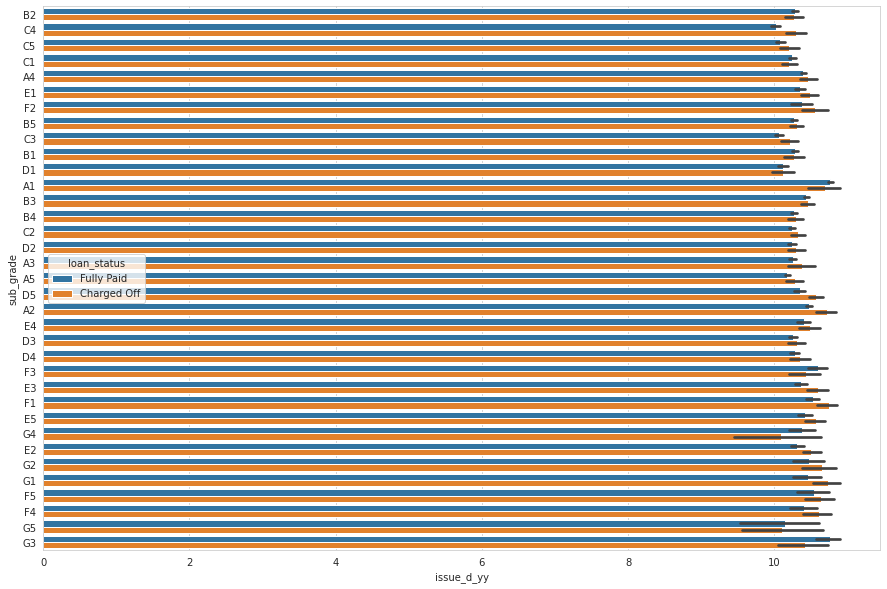

In [118]:
plt.figure(figsize = (15,10))
sns.barplot(x= "issue_d_yy", y= "sub_grade", data = data_loan, hue ="loan_status")

There is no much insight I can get from the year which the loand was issued

### Conclusion

* Investor funded loan or loan applied for around 17k-18k to a borrower belongs to grade F are more likely to be a defaulter.
* Investor funded loan around 15k-20k to a borrower belongs to sub grade F5 are more likely to be a defaulter. 
* Investor funded loan more than 12k to a borrower with a mortgage home ownership can be a defaulter.
* Borrowers taken loan for the purpose of small business and funded by investor between 10-12k  or loan applied between 14-16k are defaulters.
* Borrowers with more than 10 years of experience applied for loan in the range from 12- 14k become defaulters.
* loan applied above 20k and belongs to sub grade F5 are more likely to be a defaulter.
* Applicants belong to grade F and installment above 490 can become defaulters.
* applicants with installment above 400 and with other as home ownership can be a defaulter.
* loan asked for the purpose of small business and have monthly installment above 400 are defaulters.
*applicants with monthly installment approximately between 570-600 and belongs to sub grade G5 and F5 are more likely to be a defaulter. 
* Applicant with annual income upto 80k and belong to grade F can become a defaulter.
* Applicants with annual income below 80k and with Mortage as home ownership can be a defaulter. 
* Applicants with annual income above 80k has highest probablility to fully pay the loan.
* loan asked for the purpose of Home improvement and with annual salary approximately below 79k can become defaulters.
* Applicants with more than 10 years of experience and annual income below 72k can become defaulters.
* Applicants with interest rate above 12% are very much likely to become a defaulter.
* Applicants with any employment experience paying loan with interest rate above or equal to 12%  become a defaulter.
* Applicants applied loan for any purpose if paying loan with interest rate above or equal to 12%  become a defaulter.
* Applicants with vertification status as non verified/source verified paying loan with interest rate above or equal to 12%  become a defaulter. However, for verified status if the rate is higher than 12.5% then the applicant become a defaulter.
* Applicants with any employment experience dti above or equal to 14  become a defaulter.
* Applicants applied loan for purpose other than credit card and debt_ consolidation have dti above 12.5 have a risk of becoming a defaulter.
* Applicants with vertification status as non verified/source verified have dti above or equal to 12.5  become a defaulter.
* If the dti of a applicant is above 14.00 and grade is C then the applicant can become a defaulter. However, for Grade F and G applicant with dti higher than 14 can fully pay the loan.
* Applicants with greater than 0 are more to prone to become defaulter.


####  8 important driver variables

* debt to income(dti) ratio more than 12.5
* Grage of a applicant especially if the grade is F and C if the dti is high.
* Sub-grade of a applicant especially F5.
* Annual Income less than 80K.
* House ownership as mortgage.
* Interest Rate mire than 12%
* Number of bankrupties more than 0.
* Purpose of loan are - debt_consolidation, small business.